In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
training_df = pd.read_csv('dengue_features_train.csv')
training_df.head

<bound method NDFrame.head of      city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
...   ...   ...         ...             ...       ...       ...       ...   
1451   iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1452   iq  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1453   iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanaly

In [3]:
labels_df = pd.read_csv('dengue_labels_train.csv')
labels_df.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [4]:
df = pd.merge(
    training_df,
    labels_df,
    on=['city', 'year', 'weekofyear'],
    how='left'
)
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [5]:
print(df.isnull().sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [6]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


In [7]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


# Time Series Model:
- splitting by city (SJ, IQ)
- 80/20 train test split for time series model
- train and test sets for each city

In [8]:
sj_data = df[df['city'] == 'sj'].copy()
iq_data = df[df['city'] == 'iq'].copy()

In [9]:
sj_split_idx = int(len(sj_data) * 0.8)
iq_split_idx = int(len(iq_data) * 0.8)

In [10]:
sj_train = sj_data.iloc[:sj_split_idx].copy()
sj_test = sj_data.iloc[sj_split_idx:].copy()

iq_train = iq_data.iloc[:iq_split_idx].copy()
iq_test = iq_data.iloc[iq_split_idx:].copy()

In [11]:
train_df = pd.concat([sj_train, iq_train], axis=0)
test_df = pd.concat([sj_test, iq_test], axis=0)

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (1164, 25)
Test set shape: (292, 25)


In [12]:
print("\nSan Juan training period:")
print(f"Start: {sj_train['week_start_date'].min()}, End: {sj_train['week_start_date'].max()}")
print("San Juan test period:")
print(f"Start: {sj_test['week_start_date'].min()}, End: {sj_test['week_start_date'].max()}")

print("\nIquitos training period:")
print(f"Start: {iq_train['week_start_date'].min()}, End: {iq_train['week_start_date'].max()}")
print("Iquitos test period:")
print(f"Start: {iq_test['week_start_date'].min()}, End: {iq_test['week_start_date'].max()}")


San Juan training period:
Start: 1990-04-30 00:00:00, End: 2004-09-09 00:00:00
San Juan test period:
Start: 2004-09-16 00:00:00, End: 2008-04-22 00:00:00

Iquitos training period:
Start: 2000-07-01 00:00:00, End: 2008-06-24 00:00:00
Iquitos test period:
Start: 2008-07-01 00:00:00, End: 2010-06-25 00:00:00


# Feature Imputations:
- NDVI feature - create a copy to avoid changing the original df; imputations will be by city, and will be based on week-of-year patterns; will be replacing NaNs using the weekofyear median instead of mean to reduce the influence of outliers; will execute a forward/backward fill for any remaining missing values (NaNs).
- Precipitation features - will follow same steps as NDVI features
- Reanalysis features - these features are highly correlated (see EDA notebook), so I'm going to explore KNN to see if we can use clustering for feature reduction pertaining to reanalysis features

In [13]:
ndvi_columns = [col for col in train_df.columns if 'ndvi' in col]
print(f"NDVI columns to impute: {ndvi_columns}")

def impute_ndvi(df):
    imputed_df = df.copy()
    
    cities = df['city'].unique()
    
    for city in cities:
        city_data = df[df['city'] == city]
        weekly_medians = city_data.groupby('weekofyear')[ndvi_columns].median()
        
        city_missing = imputed_df['city'] == city
        
        for col in ndvi_columns:
            missing_mask = city_missing & imputed_df[col].isna()
            
            if missing_mask.sum() > 0:
                for idx in imputed_df[missing_mask].index:
                    week = imputed_df.loc[idx, 'weekofyear']
                    if not pd.isna(weekly_medians.loc[week, col]):
                        imputed_df.loc[idx, col] = weekly_medians.loc[week, col]
    
    return imputed_df

train_imputed = impute_ndvi(train_df)
test_imputed = impute_ndvi(test_df)

print("\nMissing NDVI values in training set before imputation:")
print(train_df[ndvi_columns].isnull().sum())
print("\nMissing NDVI values in training set after imputation:")
print(train_imputed[ndvi_columns].isnull().sum())

print("\nMissing NDVI values in test set before imputation:")
print(test_df[ndvi_columns].isnull().sum())
print("\nMissing NDVI values in test set after imputation:")
print(test_imputed[ndvi_columns].isnull().sum())

NDVI columns to impute: ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']

Missing NDVI values in training set before imputation:
ndvi_ne    158
ndvi_nw     44
ndvi_se     20
ndvi_sw     20
dtype: int64

Missing NDVI values in training set after imputation:
ndvi_ne    3
ndvi_nw    3
ndvi_se    3
ndvi_sw    3
dtype: int64

Missing NDVI values in test set before imputation:
ndvi_ne    36
ndvi_nw     8
ndvi_se     2
ndvi_sw     2
dtype: int64

Missing NDVI values in test set after imputation:
ndvi_ne    2
ndvi_nw    2
ndvi_se    2
ndvi_sw    2
dtype: int64


In [14]:
def handle_remaining_missing(df, columns):
    result_df = df.copy()
    
    cities = df['city'].unique()
    
    for city in cities:
        city_mask = result_df['city'] == city
        
        city_data = result_df[city_mask].sort_values('week_start_date')
        
        for col in columns:
            city_data[col] = city_data[col].fillna(method='ffill')
            city_data[col] = city_data[col].fillna(method='bfill')
            
        result_df.loc[city_mask] = city_data
    
    return result_df

train_imputed = handle_remaining_missing(train_imputed, ndvi_columns)
test_imputed = handle_remaining_missing(test_imputed, ndvi_columns)

print("\nMissing NDVI values in training set after forward/backward fill:")
print(train_imputed[ndvi_columns].isnull().sum())
print("\nMissing NDVI values in test set after forward/backward fill:")
print(test_imputed[ndvi_columns].isnull().sum())


Missing NDVI values in training set after forward/backward fill:
ndvi_ne    0
ndvi_nw    0
ndvi_se    0
ndvi_sw    0
dtype: int64

Missing NDVI values in test set after forward/backward fill:
ndvi_ne    0
ndvi_nw    0
ndvi_se    0
ndvi_sw    0
dtype: int64


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='bfill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.f

In [15]:
precip_columns = [
    'precipitation_amt_mm', 
    'reanalysis_sat_precip_amt_mm',
    'reanalysis_precip_amt_kg_per_m2',
    'station_precip_mm'
]
print(f"Precipitation columns to impute: {precip_columns}")

print("\nMissing precipitation values in training set:")
print(train_imputed[precip_columns].isnull().sum())
print("\nMissing precipitation values in test set:")
print(test_imputed[precip_columns].isnull().sum())

Precipitation columns to impute: ['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'station_precip_mm']

Missing precipitation values in training set:
precipitation_amt_mm               10
reanalysis_sat_precip_amt_mm       10
reanalysis_precip_amt_kg_per_m2     7
station_precip_mm                  15
dtype: int64

Missing precipitation values in test set:
precipitation_amt_mm               3
reanalysis_sat_precip_amt_mm       3
reanalysis_precip_amt_kg_per_m2    3
station_precip_mm                  7
dtype: int64


In [16]:
def impute_precipitation(df):
    imputed_df = df.copy()
    
    cities = df['city'].unique()
    
    for city in cities:
        city_data = df[df['city'] == city]
        weekly_medians = city_data.groupby('weekofyear')[precip_columns].median()
        
        city_missing = imputed_df['city'] == city
        
        for col in precip_columns:
            missing_mask = city_missing & imputed_df[col].isna()
            
            if missing_mask.sum() > 0:
                for idx in imputed_df[missing_mask].index:
                    week = imputed_df.loc[idx, 'weekofyear']
                    if not pd.isna(weekly_medians.loc[week, col]):
                        imputed_df.loc[idx, col] = weekly_medians.loc[week, col]
    
    return imputed_df

train_imputed = impute_precipitation(train_imputed)
test_imputed = impute_precipitation(test_imputed)

train_imputed = handle_remaining_missing(train_imputed, precip_columns)
test_imputed = handle_remaining_missing(test_imputed, precip_columns)

print("\nMissing precipitation values in training set after imputation:")
print(train_imputed[precip_columns].isnull().sum())
print("\nMissing precipitation values in test set after imputation:")
print(test_imputed[precip_columns].isnull().sum())


Missing precipitation values in training set after imputation:
precipitation_amt_mm               0
reanalysis_sat_precip_amt_mm       0
reanalysis_precip_amt_kg_per_m2    0
station_precip_mm                  0
dtype: int64

Missing precipitation values in test set after imputation:
precipitation_amt_mm               0
reanalysis_sat_precip_amt_mm       0
reanalysis_precip_amt_kg_per_m2    0
station_precip_mm                  0
dtype: int64


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='bfill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.f

In [17]:
reanalysis_columns = [col for col in train_df.columns
                      if 'reanalysis' in col and col not in precip_columns]
print(f"Reanalysis columns to analyze: {reanalysis_columns}")

Reanalysis columns to analyze: ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']


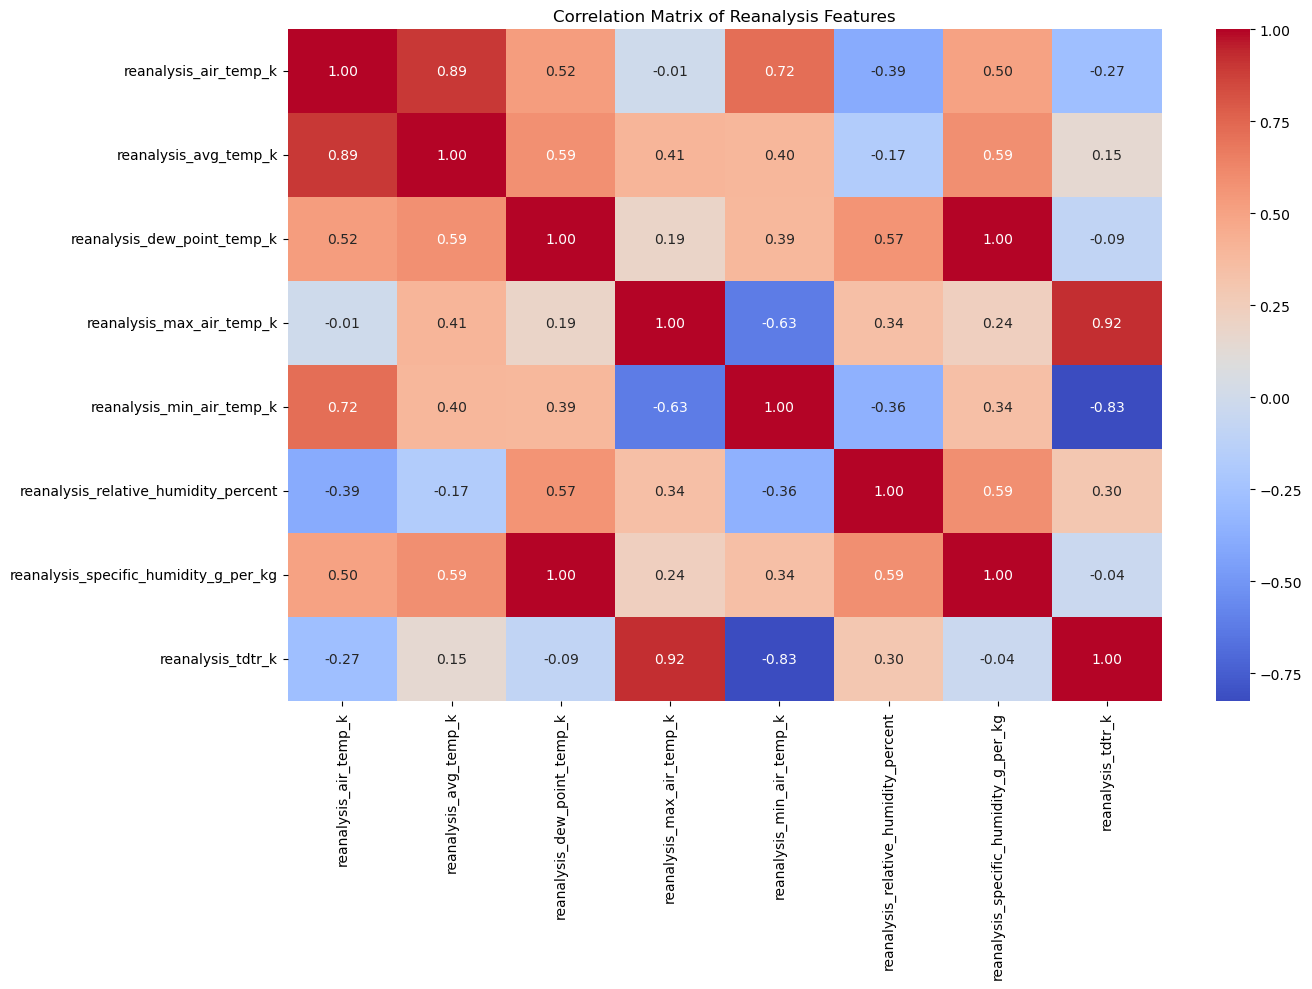

In [18]:
plt.figure(figsize=(14, 10))
reanalysis_corr = train_df[reanalysis_columns].corr()
sns.heatmap(reanalysis_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Reanalysis Features')
plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

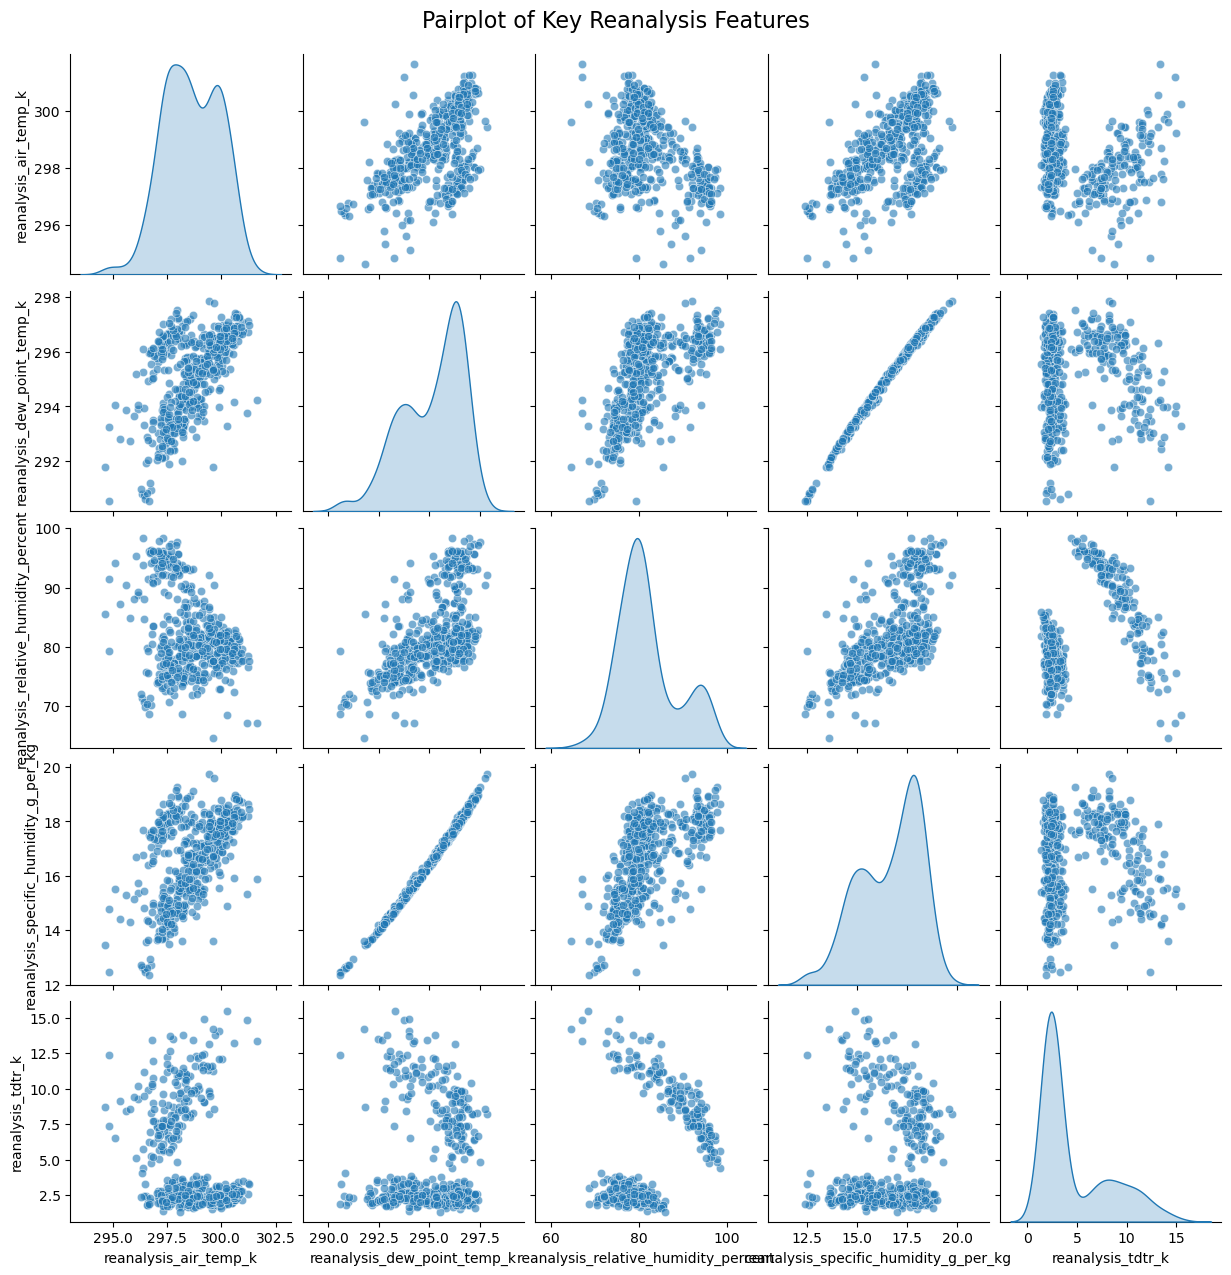

In [19]:
key_reanalysis = ['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']

plt.figure(figsize=(15, 12))
sns.pairplot(train_df[key_reanalysis].sample(500),
             diag_kind='kde',
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Reanalysis Features', y=1.02, fontsize=16)
plt.show()

# Time Series Plot for San Juan of Reanalysis Features

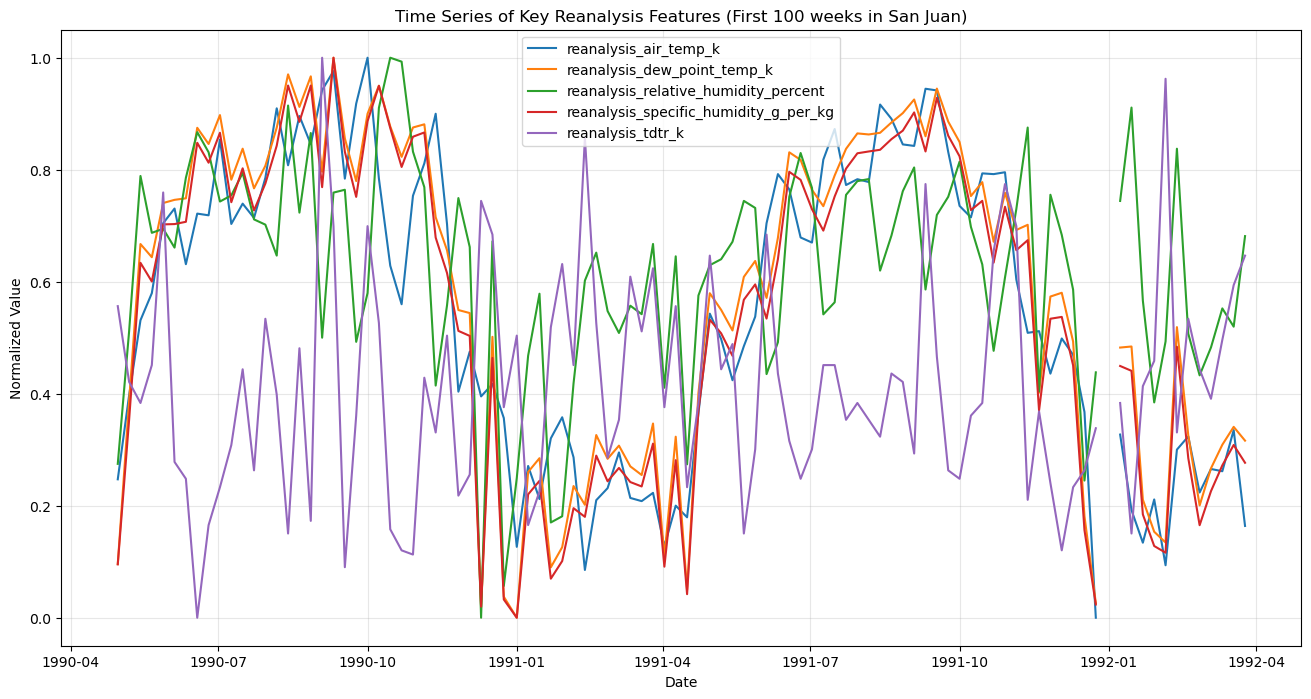

In [20]:
plt.figure(figsize=(16, 8))
sj_sample = train_df[train_df['city'] == 'sj'].iloc[:100]

for col in key_reanalysis:
    norm_values = (sj_sample[col] - sj_sample[col].min()) / (sj_sample[col].max() - sj_sample[col].min())
    plt.plot(sj_sample['week_start_date'], norm_values, label=col)
    
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Time Series of Key Reanalysis Features (First 100 weeks in San Juan)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Interpreting Time Series Plot
- all climate variables show seasonal patterns w/ yearly cycles 
- air temperature (blue line) and dew point temperature (orange line) track very closely together, confirms the high correlation in the correlation matrix
- humidity (green line) moves in the same direction as temperature lines for the most part, it mostly diverges during the transition periods
- temperature diurnal range (purple line) has a different pattern for the most part from the other variables, it has higher variability and it's not as in sync with the other variables.

# Takeaways:
- Climate variables have strong seasonal patterns
- Clear relationships between almost all the variables, this will help with avoiding multicollinearity 
- Keep the diurnal temperature variable (reanalysis_tdtr_k) as the single temperature variable (reduce dimensionality). It represents avg. temp so it gives a more stable signal that min and max temp variables.
- Moving forward with KNN for reanalysis features due to the strong correlation among these features.

In [21]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

reanalysis_columns = [col for col in train_imputed.columns
                      if 'reanalysis' in col and col not in precip_columns]

print(f"Reanalysis columns to impute with KNN: {reanalysis_columns}")

Reanalysis columns to impute with KNN: ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']


In [22]:
def knn_impute_reanalysis(train_df, test_df, n_neighbors=5):
    train_imp = train_df.copy()
    test_imp = test_df.copy()
    
    for city in ['sj', 'iq']:
        print(f"\nProcessing {city} data...")
        
        train_city = train_imp[train_imp['city'] == city]
        test_city = test_imp[test_imp['city'] == city]
        
        train_features = train_city[['weekofyear']+ reanalysis_columns].copy()
        test_features = test_city[['weekofyear']+ reanalysis_columns].copy()
        
        scaler = StandardScaler()
        
        #mask for the non missing values
        non_missing_mask = ~train_features.isna().any(axis=1)
        if non_missing_mask.sum() > 0:
            scaler.fit(train_features[non_missing_mask])
        else:
            print(f"Warning: No complete rows found for {city}. Using all data for scaling.")
            temp_imputer = KNNImputer(n_neighbors=1) #Temporarily imputing here for scaling purposes!
            temp_data = temp_imputer.fit_transform(train_features)
            scaler.fit(temp_data)
        
        #scaling the columns individually because I can't scale directly with missing values    
        for col in train_features.columns:
            train_col_data = train_features[col].dropna().values.reshape(-1, 1)
            if len(train_col_data) > 0:
                col_mean = train_col_data.mean()
                col_std = train_col_data.std()
                if col_std > 0:
                    train_features.loc[~train_features[col].isna(), col] = (
                        (train_features.loc[~train_features[col].isna(), col] - col_mean) / col_std
                    )
                    test_features.loc[~test_features[col].isna(), col] = (
                        (test_features.loc[~test_features[col].isna(), col] - col_mean) / col_std
                    )
                    
        imputer = KNNImputer(n_neighbors=n_neighbors)
        imputer.fit(train_features)
        
        train_imputed_values = imputer.transform(train_features)
        test_imputed_values = imputer.transform(test_features)
        
        train_imputed_df = pd.DataFrame(train_imputed_values,
                                        columns=train_features.columns,
                                        index=train_city.index)
        test_imputed_df = pd.DataFrame(test_imputed_values,
                                       columns=test_features.columns,
                                       index=test_city.index)
        
        # reversing the standardization/unscaling the imputed values
        for i, col in enumerate(train_features.columns):
            train_col_data = train_features[col].dropna().values.reshape(-1, 1)
            if len(train_col_data) > 0:
                col_mean = train_col_data.mean()
                col_std = train_col_data.std()
                if col_std > 0:
                    train_imputed_df[col] = train_imputed_df[col] * col_std + col_mean
                    test_imputed_df[col] = test_imputed_df[col] * col_std + col_mean
                    
        for col in reanalysis_columns:
            train_imp.loc[train_city.index, col] = train_imputed_df[col]
            test_imp.loc[test_city.index, col] = test_imputed_df[col]
            
    return train_imp, test_imp

print("Applying KNN imputation to reanalysis features...")
train_imputed, test_imputed = knn_impute_reanalysis(train_imputed, test_imputed, n_neighbors=5)

print("\nMissing reanalysis values in training set after KNN imputation:")
print(train_imputed[reanalysis_columns].isnull().sum())
print("\nMissing reanalysis values in test set after KNN imputation:")
print(test_imputed[reanalysis_columns].isnull().sum())

Applying KNN imputation to reanalysis features...

Processing sj data...

Processing iq data...

Missing reanalysis values in training set after KNN imputation:
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_relative_humidity_percent     0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
dtype: int64

Missing reanalysis values in test set after KNN imputation:
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_relative_humidity_percent     0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
dtype: int64


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/3412851676.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.57468564 -0.5073087  -0.43993176 -0.37255483 -0.30517789 -0.23780095
 -0.17042402 -0.10304708 -0.03567014  0.03170679  0.09908373  0.16646067
  0.2338376   0.30121454  0.36859148  0.43596842  0.50334535  0.57072229
  0.63809923  0.70547616  0.7728531   0.84023004  0.90760697  0.97498391
  1.04236085  1.10973778  1.17711472  1.24449166  1.31186859  1.37924553
  1.44662247  1.5139994   1.58137634  1.64875328  1.71613022 -1.72009356
 -1.65271663 -1.58533969 -1.51796275 -1.45058582 -1.38320888 -1.31583194
 -1.24845501 -1.18107807 -1.11370113 -1.0463242  -0.97894726 -0.91157032
 -0.84419339 -0.77681645 -0.70943951 -0.64206257 -0.57468564 -0.5073087
 -0.43993176 -0.37255483 -0.30517789 -0.23780095 -0.17042402 -0.10304708
 -0.03567014  0.03170679  0.09908373  0.16646067  0.2338376

Generating PCA visualization...


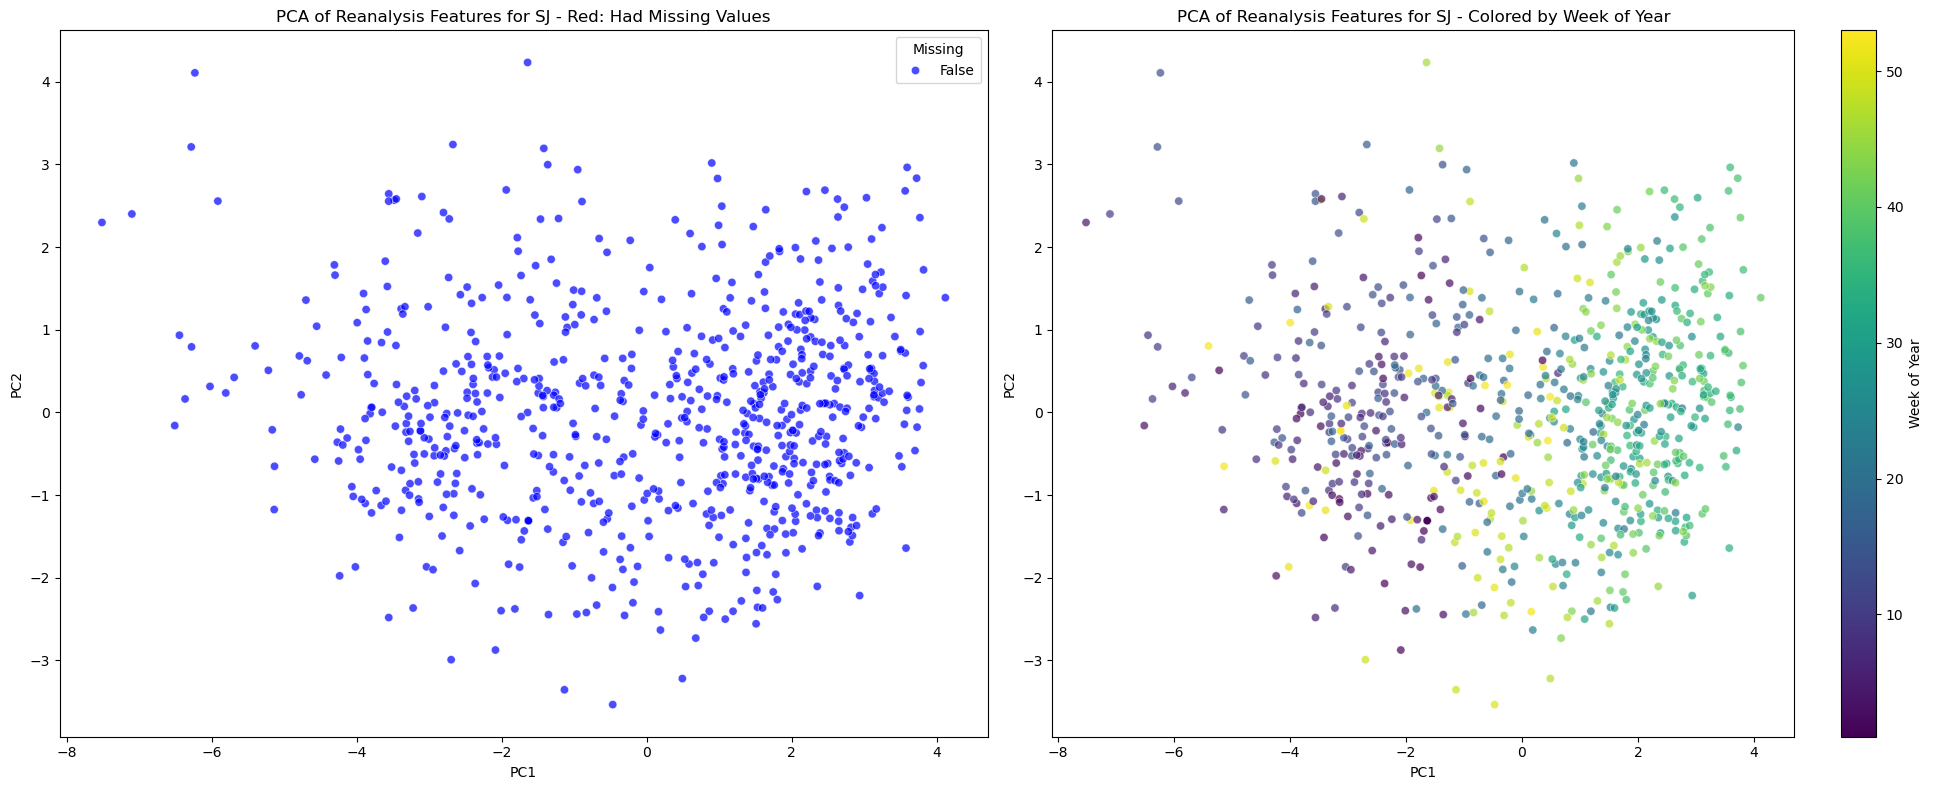

Generating t-SNE visualization (this may take a moment)...


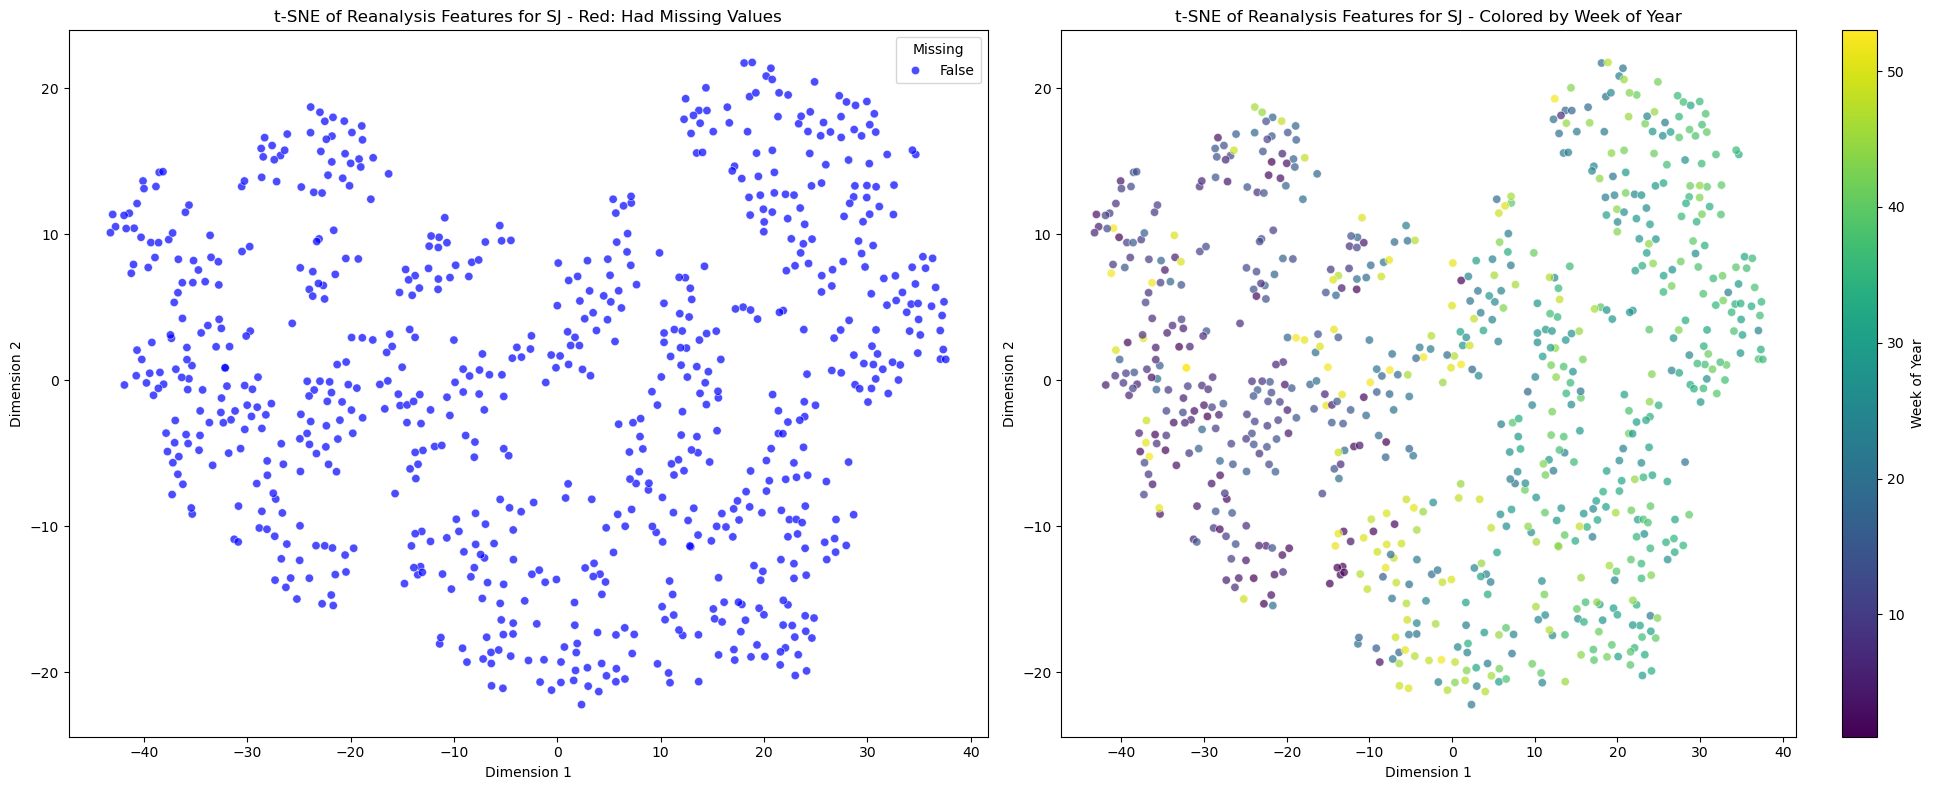

Generating PCA visualization...


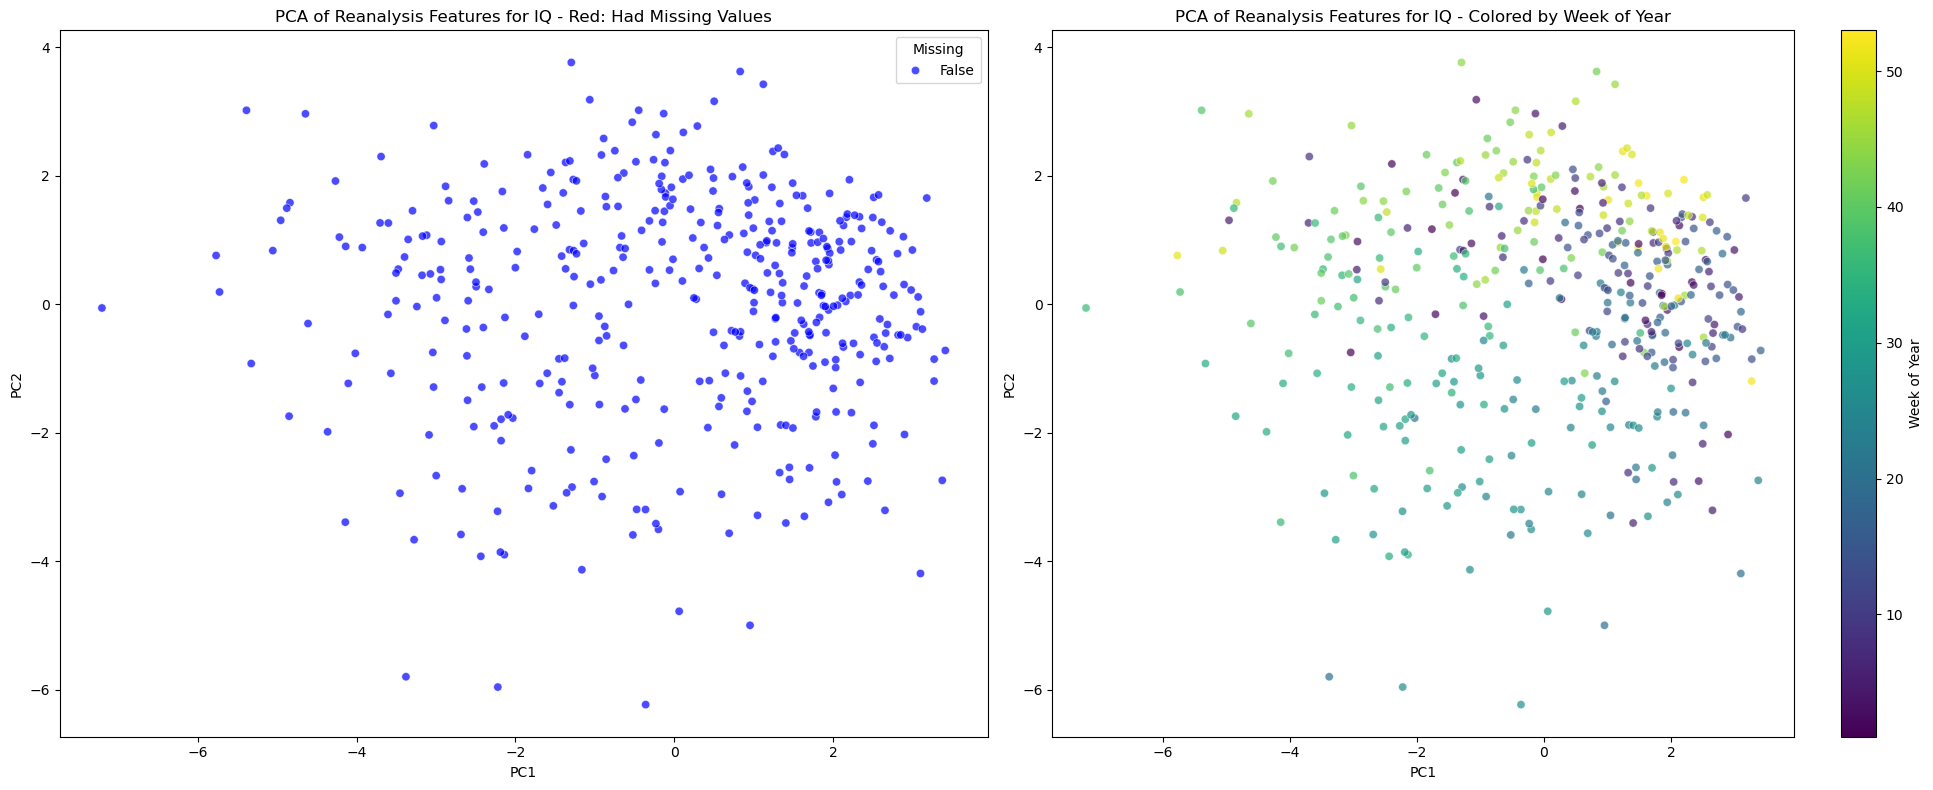

Generating t-SNE visualization (this may take a moment)...


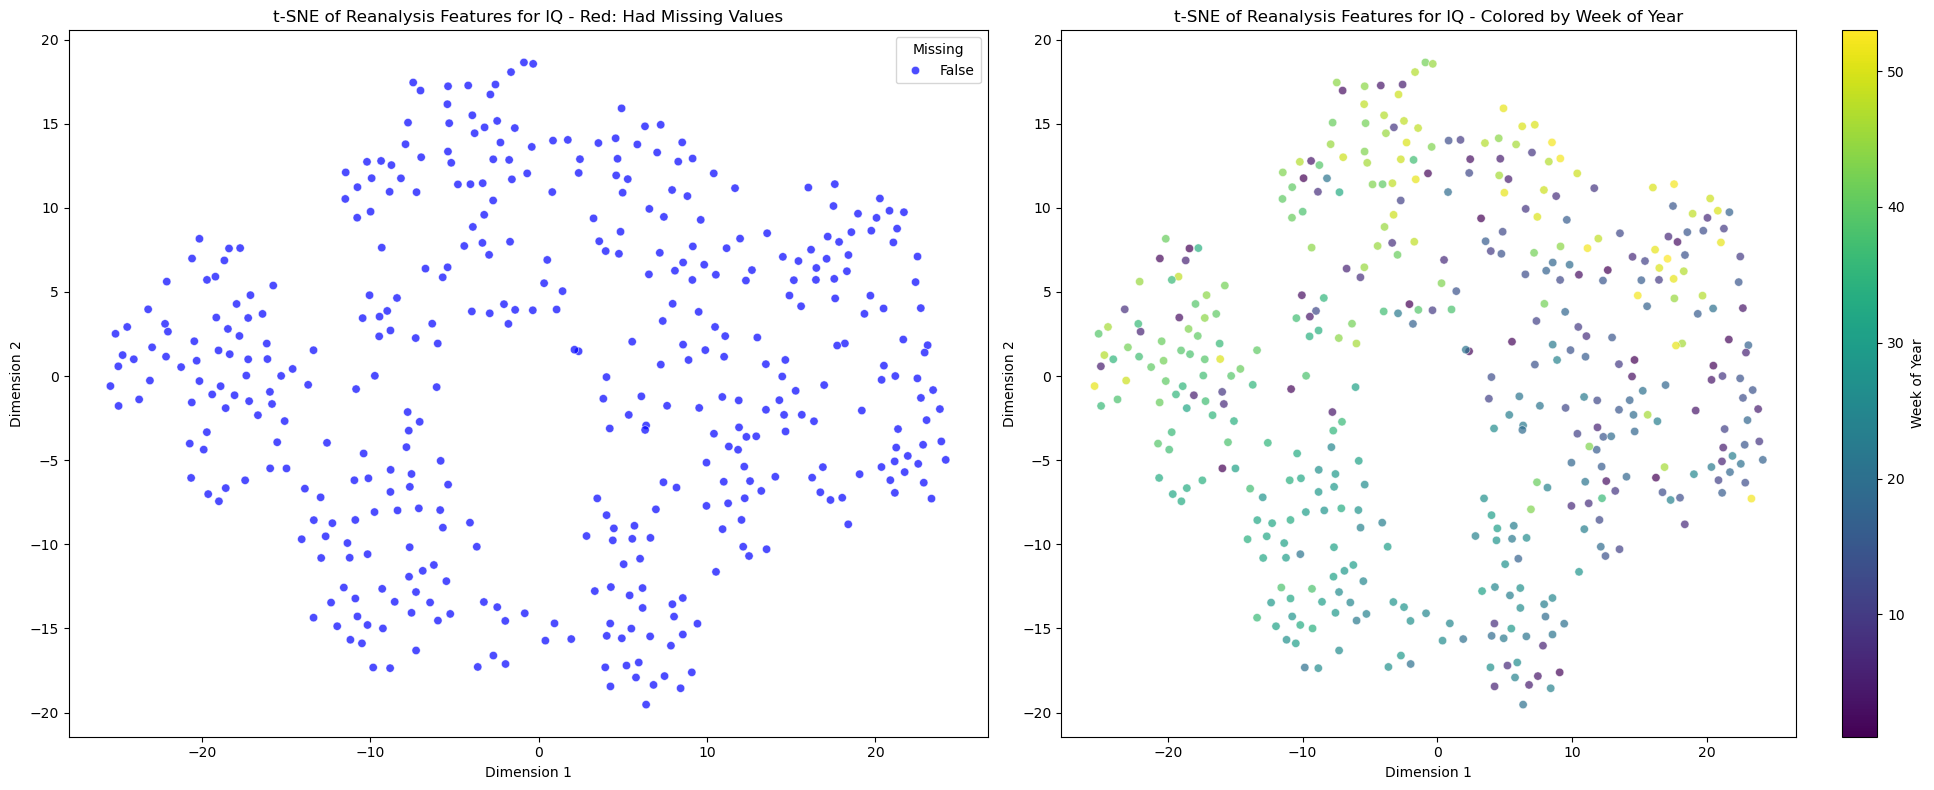

(PCA(n_components=2), TSNE(perplexity=30, random_state=42))

In [57]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def visualize_knn_imputation(df_original, df_imputed, feature_cols, city='sj'):
    # Filter data for the specified city
    original = df_original[df_original['city'] == city].copy()
    imputed = df_imputed[df_imputed['city'] == city].copy()
    
    # Create missing data mask for the original dataframe
    missing_mask = original[feature_cols].isna().any(axis=1)
    
    # Extract the feature data
    X_orig = original[feature_cols].copy()
    X_imp = imputed[feature_cols].copy()
    
    # 1. Principal Component Analysis (PCA) for 2D visualization
    print("Generating PCA visualization...")
    pca = PCA(n_components=2)
    
    # Fit PCA on the imputed data (no missing values)
    pca_result = pca.fit_transform(X_imp)
    
    # Create a DataFrame for plotting
    pca_df = pd.DataFrame({
        'PC1': pca_result[:, 0],
        'PC2': pca_result[:, 1],
        'Missing': missing_mask,
        'Week': original['weekofyear']
    })
    
    # Plot PCA with points colored by missing status
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot by missing status
    sns.scatterplot(x='PC1', y='PC2', hue='Missing', 
                   data=pca_df, ax=axes[0], alpha=0.7,
                   palette={True: 'red', False: 'blue'})
    axes[0].set_title(f'PCA of Reanalysis Features for {city.upper()} - Red: Had Missing Values')
    
    # Plot by week of year to see seasonal patterns
    scatter = sns.scatterplot(x='PC1', y='PC2', hue='Week', 
                            data=pca_df, ax=axes[1], alpha=0.7,
                            palette='viridis', legend=False)
    axes[1].set_title(f'PCA of Reanalysis Features for {city.upper()} - Colored by Week of Year')
    
    # Add a colorbar for the week
    from matplotlib.cm import ScalarMappable
    from matplotlib.colors import Normalize
    sm = ScalarMappable(cmap='viridis', norm=Normalize(vmin=1, vmax=53))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes[1])
    cbar.set_label('Week of Year')
    
    plt.tight_layout()
    plt.show()
    
    # 2. t-SNE for potentially better cluster visualization
    print("Generating t-SNE visualization (this may take a moment)...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    
    # Apply t-SNE
    tsne_result = tsne.fit_transform(X_imp)
    
    # Create a DataFrame for plotting
    tsne_df = pd.DataFrame({
        'Dimension 1': tsne_result[:, 0],
        'Dimension 2': tsne_result[:, 1],
        'Missing': missing_mask,
        'Week': original['weekofyear']
    })
    
    # Plot t-SNE results
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot by missing status
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Missing', 
                   data=tsne_df, ax=axes[0], alpha=0.7,
                   palette={True: 'red', False: 'blue'})
    axes[0].set_title(f't-SNE of Reanalysis Features for {city.upper()} - Red: Had Missing Values')
    
    # Plot by week of year
    scatter = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Week', 
                            data=tsne_df, ax=axes[1], alpha=0.7,
                            palette='viridis', legend=False)
    axes[1].set_title(f't-SNE of Reanalysis Features for {city.upper()} - Colored by Week of Year')
    
    # Add a colorbar for the week
    sm = ScalarMappable(cmap='viridis', norm=Normalize(vmin=1, vmax=53))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes[1])
    cbar.set_label('Week of Year')
    
    plt.tight_layout()
    plt.show()
    
    return pca, tsne

# Compare original train_df with imputed train_imputed
# Keep a copy of the original dataframe for comparison
train_original = train_df.copy()

# Visualize for San Juan
visualize_knn_imputation(train_original, train_imputed, reanalysis_columns, city='sj')

# Visualize for Iquitos
visualize_knn_imputation(train_original, train_imputed, reanalysis_columns, city='iq')

In [24]:
# Station features imputation
# Using city-specific, week-of-year median approach similar to other features

# Identify station columns
station_columns = [col for col in train_imputed.columns if 'station' in col and col != 'station_precip_mm']
print(f"Station columns to impute: {station_columns}")

# Check missing values in station columns
print("\nMissing station values in training set:")
print(train_imputed[station_columns].isnull().sum())
print("\nMissing station values in test set:")
print(test_imputed[station_columns].isnull().sum())

# Function to impute station values by city and week of year using median
def impute_station(df):
    imputed_df = df.copy()
    
    cities = df['city'].unique()
    
    for city in cities:
        city_data = df[df['city'] == city]
        weekly_medians = city_data.groupby('weekofyear')[station_columns].median()
        
        city_missing = imputed_df['city'] == city
        
        for col in station_columns:
            missing_mask = city_missing & imputed_df[col].isna()
            
            if missing_mask.sum() > 0:
                for idx in imputed_df[missing_mask].index:
                    week = imputed_df.loc[idx, 'weekofyear']
                    if not pd.isna(weekly_medians.loc[week, col]):
                        imputed_df.loc[idx, col] = weekly_medians.loc[week, col]
    
    return imputed_df

# Apply imputation
train_imputed = impute_station(train_imputed)
test_imputed = impute_station(test_imputed)

# Handle any remaining missing values
train_imputed = handle_remaining_missing(train_imputed, station_columns)
test_imputed = handle_remaining_missing(test_imputed, station_columns)

# Check final results
print("\nMissing station values in training set after imputation:")
print(train_imputed[station_columns].isnull().sum())
print("\nMissing station values in test set after imputation:")
print(test_imputed[station_columns].isnull().sum())

Station columns to impute: ['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c']

Missing station values in training set:
station_avg_temp_c         36
station_diur_temp_rng_c    36
station_max_temp_c         14
station_min_temp_c         11
dtype: int64

Missing station values in test set:
station_avg_temp_c         7
station_diur_temp_rng_c    7
station_max_temp_c         6
station_min_temp_c         3
dtype: int64

Missing station values in training set after imputation:
station_avg_temp_c         0
station_diur_temp_rng_c    0
station_max_temp_c         0
station_min_temp_c         0
dtype: int64

Missing station values in test set after imputation:
station_avg_temp_c         0
station_diur_temp_rng_c    0
station_max_temp_c         0
station_min_temp_c         0
dtype: int64


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='bfill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_data[col] = city_data[col].fillna(method='ffill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/781820487.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.f

In [25]:
print("Remaining missing values in training set:")
print(train_imputed.isnull().sum().sum())
print("\nRemaining missing values in test set:")
print(test_imputed.isnull().sum().sum())

if train_imputed.isnull().sum().sum() == 0 and test_imputed.isnull().sum().sum() == 0:
    print("\nAll missing values have been successfully imputed!")
else:
    print("\nThere are still some missing values. Additional imputation may be needed.")
    # Show columns with missing values
    print("\nColumns with missing values in training set:")
    missing_cols_train = train_imputed.columns[train_imputed.isnull().any()].tolist()
    print(missing_cols_train)

    print("\nColumns with missing values in test set:")
    missing_cols_test = test_imputed.columns[test_imputed.isnull().any()].tolist()
    print(missing_cols_test)

# Save the fully prepared datasets to CSV
train_imputed.to_csv('dengue_train_cleaned.csv', index=False)
test_imputed.to_csv('dengue_test_cleaned.csv', index=False)

print("\nCleaned datasets saved to dengue_train_cleaned.csv and dengue_test_cleaned.csv")
# Display a sample of the final cleaned dataset
print("\nSample of the final cleaned training dataset:")
train_imputed.sample(5)

Remaining missing values in training set:
0

Remaining missing values in test set:
0

All missing values have been successfully imputed!

Cleaned datasets saved to dengue_train_cleaned.csv and dengue_test_cleaned.csv

Sample of the final cleaned training dataset:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
301,sj,1996,7,1996-02-12,0.068950,0.136850,0.218814,0.214300,29.30,-1.230742,...,0.216554,29.30,-0.849088,-0.477067,25.314286,7.442857,31.1,21.1,25.5,16
1268,iq,2006,46,2006-11-19,0.319143,0.186286,0.273700,0.247029,86.65,-0.453645,...,0.804904,86.65,0.585375,-0.792852,27.600000,10.166667,33.2,21.8,85.6,13
713,sj,2004,3,2004-01-15,0.030750,0.002600,0.282100,0.289900,36.07,-1.082579,...,0.003271,36.07,-0.836936,-0.598146,24.342857,5.957143,28.3,20.0,23.7,14
485,sj,1999,34,1999-08-27,-0.014650,0.036550,0.168900,0.153257,133.65,0.980772,...,0.906659,133.65,1.193406,-0.658686,27.857143,6.842857,33.9,23.9,78.5,25
598,sj,2001,44,2001-10-29,-0.019350,0.059550,0.227457,0.160029,0.49,1.120434,...,0.395626,0.49,1.059732,0.037522,27.942857,6.357143,31.1,24.4,11.3,71


In [26]:
train_df = pd.read_csv('dengue_train_cleaned.csv')
test_df = pd.read_csv('dengue_test_cleaned.csv')

# Feature Engineering

1. Temporal Features:
- Lagged variables - going to create 1-4 week lags of case counts and climate variables. Doing this will capture the delayed effects of environmental conditions on outbreaks.
- Rolling windows - going to implement 2, 4, and 8 week rolling avgs for climate variables.
- Cumulative Features - totals of precipitation over various time periods.

2. Seasonal Features:
- Cyclical features - transform 'weekofyear' into sine/cosine components to capture seasonality
- Seasonal indicators - binary variables for rainy/dry seasons specific to each city
- Historical seasonal patterns - avg cases by 'weekofyear' from previous years

3. Interacting Terms:
- Temp x Humidity - the interaction of these features affects mosquito breeding conditions
- Precipitation x NDVI - the interaction of these features show vegetation combined with rainfall creates breeding grounds
- City-specific interactions - different interactions terms for San Juan v. Iquitos

4. Domain-Specific Transformations:
- Mosquito breeding thresholds - binary indicators for when conditions cross ideal breeding thresholds
- Vegetation index aggregation - combine all four NVDI features into one meaningful measure
- Climate anomalies - calculate deviations from seasonal norms

# Temporal Feature Engineering Blocks:

- Lagged variables - going to create 1-4 week lags of case counts and climate variables. Doing this will capture the delayed effects of environmental conditions on outbreaks.
- Rolling windows - going to implement 2, 4, and 8 week rolling avgs for climate variables.
- Cumulative Features - totals of precipitation over various time periods.

In [28]:
#First up, creating lagged features for key variables

lag_columns = [
    'total_cases',
    'reanalysis_air_temp_k',
    'reanalysis_relative_humidity_percent',
    'reanalysis_specific_humidity_g_per_kg',
    'precipitation_amt_mm',
    'reanalysis_tdtr_k',
]

lag_periods = [1, 2, 3, 4]

In [32]:
#Creating lagged features separately for each city

for city in ['sj', 'iq']:
    city_mask = train_imputed['city'] == city
    city_data = train_imputed[city_mask].sort_values('week_start_date')
    
    for col in lag_columns:
        for lag in lag_periods:
            lag_name = f'{col}_lag{lag}'
            train_imputed.loc[city_mask, lag_name] = city_data[col].shift(lag).values
            
    city_mask = test_imputed['city'] == city
    city_data = test_imputed[city_mask].sort_values('week_start_date')
    
    for col in lag_columns:
        for lag in lag_periods:
            lag_name = f'{col}_lag{lag}'
            test_imputed.loc[city_mask, lag_name] = city_data[col].shift(lag).values

In [30]:
lag_columns_created = [f'{col}_lag{lag}' for col in lag_columns for lag in lag_periods]
train_imputed[lag_columns_created] = train_imputed[lag_columns_created].fillna(method='bfill')
test_imputed[lag_columns_created] = test_imputed[lag_columns_created].fillna(method='bfill')

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/3514848761.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_imputed[lag_columns_created] = train_imputed[lag_columns_created].fillna(method='bfill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/3514848761.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_imputed[lag_columns_created] = test_imputed[lag_columns_created].fillna(method='bfill')


In [31]:
print(f"Created {len(lag_columns_created)} new lagged features")
print(train_imputed[lag_columns_created].head())

Created 24 new lagged features
   total_cases_lag1  total_cases_lag2  total_cases_lag3  total_cases_lag4  \
0               4.0               4.0               4.0               4.0   
1               4.0               4.0               4.0               4.0   
2               5.0               4.0               4.0               4.0   
3               4.0               5.0               4.0               4.0   
4               3.0               4.0               5.0               4.0   

   reanalysis_air_temp_k_lag1  reanalysis_air_temp_k_lag2  \
0                   -1.275676                   -1.275676   
1                   -1.275676                   -1.275676   
2                   -0.732817                   -1.275676   
3                   -0.248251                   -0.732817   
4                   -0.073370                   -0.248251   

   reanalysis_air_temp_k_lag3  reanalysis_air_temp_k_lag4  \
0                   -1.275676                   -1.275676   
1                

In [36]:
#Next up, creating rolling window features for key variables. This will help capture recent trends over different time periods

roll_columns = [
    'reanalysis_air_temp_k',
    'reanalysis_relative_humidity_percent',
    'reanalysis_specific_humidity_g_per_kg',
    'precipitation_amt_mm',
    'reanalysis_tdtr_k',
    'ndvi_ne',
    'ndvi_nw',
    'ndvi_se',
    'ndvi_sw'
]

window_sizes = [2, 4, 8]
agg_functions = ['mean', 'max', 'min', 'std']

In [37]:
#Creating rolling window features separately for each city

for city in ['sj', 'iq']:
    city_mask = train_imputed['city'] == city
    city_data = train_imputed[city_mask].sort_values('week_start_date')
    
    for col in roll_columns:
        for window in window_sizes:
            for func in agg_functions:
                feature_name = f'{col}_roll_{window}_{func}'
                
                if func == 'mean':
                    values = city_data[col].rolling(window=window, min_periods=1).mean().values
                elif func == 'max':
                    values = city_data[col].rolling(window=window, min_periods=1).max().values
                elif func == 'min':
                    values = city_data[col].rolling(window=window, min_periods=1).min().values
                elif func == 'std':
                    values = city_data[col].rolling(window=window, min_periods=1).std().values
                    values = np.nan_to_num(values)
                
                train_imputed.loc[city_mask, feature_name] = values
                
    city_mask = test_imputed['city'] == city
    city_data = test_imputed[city_mask].sort_values('week_start_date')
    
    for col in roll_columns:
        for window in window_sizes:
            for func in agg_functions:
                feature_name = f'{col}_roll_{window}_{func}'
                
                if func == 'mean':
                    values = city_data[col].rolling(window=window, min_periods=1).mean().values
                elif func == 'max':
                    values = city_data[col].rolling(window=window, min_periods=1).max().values
                elif func == 'min':
                    values = city_data[col].rolling(window=window, min_periods=1).min().values
                elif func == 'std':
                    values = city_data[col].rolling(window=window, min_periods=1).std().values
                    values = np.nan_to_num(values)
                
                test_imputed.loc[city_mask, feature_name] = values
                
roll_features_created = [f'{col}_roll_{window}_{func}'
                         for col in roll_columns
                         for window in window_sizes
                         for func in agg_functions]

print(f"Created {len(roll_features_created)} new rolling window features")
print(train_imputed[roll_features_created[:5]].head)

Created 108 new rolling window features
<bound method NDFrame.head of       reanalysis_air_temp_k_roll_2_mean  reanalysis_air_temp_k_roll_2_max  \
0                             -1.275676                         -1.275676   
1                             -1.004247                         -0.732817   
2                             -0.490534                         -0.248251   
3                             -0.160811                         -0.073370   
4                              0.152517                          0.378405   
...                                 ...                               ...   
1347                          -1.119634                         -0.920499   
1348                          -1.064286                         -0.920499   
1349                          -1.297713                         -1.208072   
1350                          -1.153325                         -0.919296   
1351                          -1.039018                         -0.919296   

     

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/3884565622.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_imputed.loc[city_mask, feature_name] = values
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/3884565622.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_imputed.loc[city_mask, feature_name] = values
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/3884565622.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

In [38]:
# Next up is adding cumulative features for the precipitation variables. Idea here is accumulated rainfall over time creates standing water for mosquitoes to breed.

cum_columns = [
    'precipitation_amt_mm',
    'reanalysis_sat_precip_amt_mm',
    'station_precip_mm'
]

cum_periods = [4, 8, 12]

In [39]:
# creating cumulative features separately for each city

for city in ['sj', 'iq']:
    city_mask = train_imputed['city'] == city
    city_data = train_imputed[city_mask].sort_values('week_start_date')
    
    for col in cum_columns:
        for period in cum_periods:
            feature_name = f'{col}_cum_{period}wk'
            
            values = city_data[col].rolling(window=period, min_periods=1).sum().values
            train_imputed.loc[city_mask, feature_name] = values
            
    city_mask = test_imputed['city'] == city
    city_data = test_imputed[city_mask].sort_values('week_start_date')
    
    for col in cum_columns:
        for period in cum_periods:
            feature_name = f'{col}_cum_{period}wk'
            
            values = city_data[col].rolling(window=period, min_periods=1).sum().values
            test_imputed.loc[city_mask, feature_name] = values

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/3332613819.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_imputed.loc[city_mask, feature_name] = values
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/3332613819.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_imputed.loc[city_mask, feature_name] = values
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/3332613819.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

In [40]:
# create weighted moving averages

ewm_columns = [
    'reanalysis_air_temp_k',
    'reanalysis_relative_humidity_percent',
    'reanalysis_specific_humidity_g_per_kg',
    'precipitation_amt_mm'
]

alpha_values = [0.3, 0.6, 0.9]

In [41]:
for city in ['sj', 'iq']:
    city_mask = train_imputed['city'] == city
    city_data = train_imputed[city_mask].sort_values('week_start_date')
    
    for col in ewm_columns:
        for alpha in alpha_values:
            feature_name = f'{col}_ewm_{alpha}'
            
            values = city_data[col].ewm(alpha=alpha, adjust=False).mean().values
            train_imputed.loc[city_mask, feature_name] = values
            
    city_mask = test_imputed['city'] == city
    city_data = test_imputed[city_mask].sort_values('week_start_date')
    
    for col in ewm_columns:
        for alpha in alpha_values:
            feature_name = f'{col}_ewm_{alpha}'
            
            values = city_data[col].ewm(alpha=alpha, adjust=False).mean().values
            test_imputed.loc[city_mask, feature_name] = values
            
cum_features_created = [f'{col}_cum_{period}wk' for col in cum_columns for period in cum_periods]
ewm_features_created = [f'{col}_ewm_{alpha}' for col in ewm_columns for alpha in alpha_values]
all_new_features = cum_features_created + ewm_features_created

print(f"Created {len(all_new_features)} new cumulative and EWM features")
print(train_imputed[all_new_features[:5]].head())

Created 21 new cumulative and EWM features
   precipitation_amt_mm_cum_4wk  precipitation_amt_mm_cum_8wk  \
0                         12.42                         12.42   
1                         35.24                         35.24   
2                         69.78                         69.78   
3                         85.14                         85.14   
4                         80.24                         92.66   

   precipitation_amt_mm_cum_12wk  reanalysis_sat_precip_amt_mm_cum_4wk  \
0                          12.42                                 12.42   
1                          35.24                                 35.24   
2                          69.78                                 69.78   
3                          85.14                                 85.14   
4                          92.66                                 80.24   

   reanalysis_sat_precip_amt_mm_cum_8wk  
0                                 12.42  
1                                 35.

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/253614430.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_imputed.loc[city_mask, feature_name] = values
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/253614430.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_imputed.loc[city_mask, feature_name] = values
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/253614430.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

# Seasonal Feature Engineering Blocks:

- Cyclical features - transform 'weekofyear' into sine/cosine components to capture seasonality
- Seasonal indicators - binary variables for rainy/dry seasons specific to each city
- Historical seasonal patterns - avg cases by 'weekofyear' from previous years

In [42]:
# First for seasonal features is transforming 'weekofyear' into sine and cosine components to capture cyclical nature of weeks in a year. This will help models learn seasonal patterns better.

# Creating cyclical features for 'weekofyear'
def create_cyclical_features(df, col, period):
    """
    Create sine and cosine features for cyclical data.
    
    Args:
        df: DataFrame containing the data.
        col: Column name to transform.
        period: Cycle period (e.g., 52 for weeks in a year).
        
    Returns:
        DataFrame with new sine and cosine features.
    """
    
    angles = 2 * np.pi * df[col] / period
    df[f'{col}_sin'] = np.sin(angles)
    df[f'{col}_cos'] = np.cos(angles)
    
    return df

In [43]:
train_imputed = create_cyclical_features(train_imputed, 'weekofyear', 52)
test_imputed = create_cyclical_features(test_imputed, 'weekofyear', 52)

# creating month features from the week_start_date column
train_imputed['month'] = pd.DatetimeIndex(train_imputed['week_start_date']).month
test_imputed['month'] = pd.DatetimeIndex(test_imputed['week_start_date']).month

# creating cyclical features for month
train_imputed = create_cyclical_features(train_imputed, 'month', 12)
test_imputed = create_cyclical_features(test_imputed, 'month', 12)

# creating quarter features
train_imputed['quarter'] = (train_imputed['month'] - 1) // 3 + 1
test_imputed['quarter'] = (test_imputed['month'] - 1) // 3 + 1

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/993523021.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_sin'] = np.sin(angles)
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/993523021.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_cos'] = np.cos(angles)
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/993523021.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

In [45]:
# Next up will be to create season indicators. 

# Two seasons for both San Juan and Iquitos, rainy and dry seasons. San Juan has a rainy season from May to November(months 5-11), while Iquitos has a rainy season from November to May(months 11-12, 1-5).
# Dry season for San Juan is December to April(months 12, 1-4), and for Iquitos is June to October(months 6-10).

sj_mask = train_imputed['city'] == 'sj'
train_imputed.loc[sj_mask, 'rainy_season'] = train_imputed.loc[sj_mask, 'month'].between(5, 11).astype(int)

sj_mask = test_imputed['city'] == 'sj'
test_imputed.loc[sj_mask, 'rainy_season'] = test_imputed.loc[sj_mask, 'month'].between(5, 11).astype(int)

iq_mask = train_imputed['city'] == 'iq'
train_imputed.loc[iq_mask, 'rainy_season'] = (
    train_imputed.loc[iq_mask, 'month'].between(1, 5) |
    train_imputed.loc[iq_mask, 'month'].between(11, 12)
).astype(int)

iq_mask = test_imputed['city'] == 'iq'
test_imputed.loc[iq_mask, 'rainy_season'] = (
    test_imputed.loc[iq_mask, 'month'].between(1, 5) |
    test_imputed.loc[iq_mask, 'month'].between(11, 12)
).astype(int)

In [46]:
# peak season flags for San Juan (peak is around weeks 30-45)

sj_mask = train_imputed['city'] == 'sj'
train_imputed.loc[sj_mask, 'peak_season'] = train_imputed.loc[sj_mask, 'weekofyear'].between(30, 45).astype(int)

sj_mask = test_imputed['city'] == 'sj'
test_imputed.loc[sj_mask, 'peak_season'] = test_imputed.loc[sj_mask, 'weekofyear'].between(30, 45).astype(int)

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/814595661.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_imputed.loc[sj_mask, 'peak_season'] = train_imputed.loc[sj_mask, 'weekofyear'].between(30, 45).astype(int)
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/814595661.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_imputed.loc[sj_mask, 'peak_season'] = test_imputed.loc[sj_mask, 'weekofyear'].between(30, 45).astype(int)


In [47]:
seasonal_features = ['weekofyear_sin', 'weekofyear_cos', 'month', 'month_sin', 'month_cos', 'quarter', 'rainy_season', 'peak_season']
print("New seasonal features created:")
print(train_imputed[seasonal_features].head())

New seasonal features created:
   weekofyear_sin  weekofyear_cos  month  month_sin  month_cos  quarter  \
0        0.822984       -0.568065      4   0.866025  -0.500000        2   
1        0.748511       -0.663123      5   0.500000  -0.866025        2   
2        0.663123       -0.748511      5   0.500000  -0.866025        2   
3        0.568065       -0.822984      5   0.500000  -0.866025        2   
4        0.464723       -0.885456      5   0.500000  -0.866025        2   

   rainy_season  peak_season  
0           0.0          0.0  
1           1.0          0.0  
2           1.0          0.0  
3           1.0          0.0  
4           1.0          0.0  


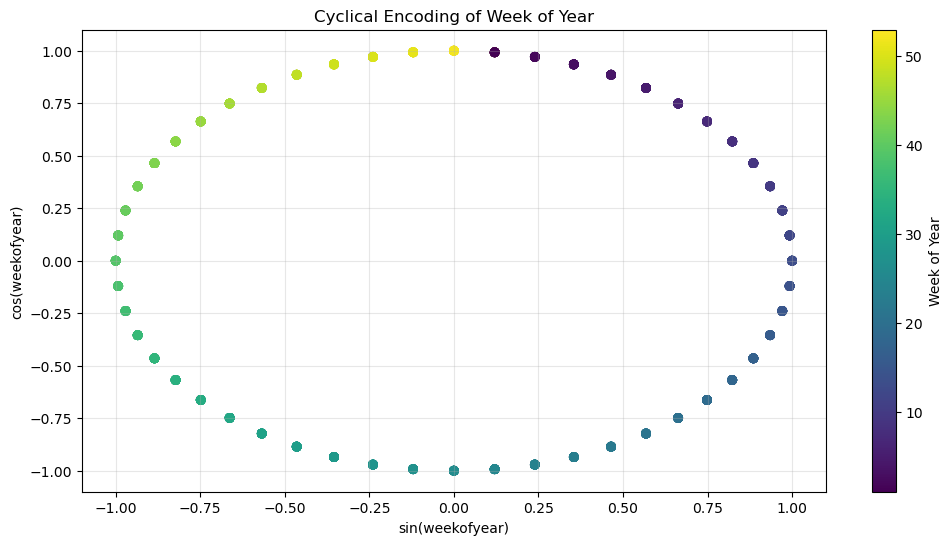

In [48]:
plt.figure(figsize=(12, 6))
plt.scatter(train_imputed['weekofyear_sin'], train_imputed['weekofyear_cos'], c=train_imputed['weekofyear'], cmap='viridis')
plt.title('Cyclical Encoding of Week of Year')
plt.xlabel('sin(weekofyear)')
plt.ylabel('cos(weekofyear)')
plt.colorbar(label='Week of Year')
plt.grid(True, alpha=0.3)
plt.show()

In [49]:
# Lastly is creating historical seasonal patterns. Avg cases by weekofyear from previous years

# going to groupby city and weekofyear to calculate historical averages
historical_patterns = train_imputed.groupby(['city', 'weekofyear'])['total_cases'].mean().reset_index()
historical_patterns.rename(columns={'total_cases': 'historical_avg_cases'}, inplace=True)

train_imputed = train_imputed.merge(historical_patterns, on=['city', 'weekofyear'], how='left')
test_imputed = test_imputed.merge(historical_patterns, on=['city', 'weekofyear'], how='left')

print("Added historical seasonal patterns:")
print(train_imputed[['city', 'weekofyear', 'historical_avg_cases']].head())

Added historical seasonal patterns:
  city  weekofyear  historical_avg_cases
0   sj          18             11.600000
1   sj          19             10.800000
2   sj          20             12.400000
3   sj          21             11.733333
4   sj          22             14.133333


# Interaction Terms Feature Engineering Blocks:

- Temp x Humidity - the interaction of these features affects mosquito breeding conditions
- Precipitation x NDVI - the interaction of these features show vegetation combined with rainfall creates breeding grounds
- City-specific interactions - different interactions terms for San Juan v. Iquitos

In [50]:
# First I'll tackle temp x humidity interaction. 
train_imputed['temp_humidity'] = train_imputed['reanalysis_air_temp_k'] * train_imputed['reanalysis_relative_humidity_percent']
test_imputed['temp_humidity'] = test_imputed['reanalysis_air_temp_k'] * test_imputed['reanalysis_relative_humidity_percent']

In [51]:
# Next is precipitation x vegitation interaction
for ndvi in ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']:
    feature_name = f'precip_{ndvi}'
    train_imputed[feature_name] = train_imputed['precipitation_amt_mm'] * train_imputed[ndvi]
    test_imputed[feature_name] = test_imputed['precipitation_amt_mm'] * test_imputed[ndvi]

In [52]:
# Temp x precipitation lag interaction, this captures the delayed effect of rain following warm periods
train_imputed['temp_precip_lag'] = train_imputed['reanalysis_air_temp_k'] * train_imputed['precipitation_amt_mm_lag2']
test_imputed['temp_precip_lag'] = test_imputed['reanalysis_air_temp_k'] * test_imputed['precipitation_amt_mm_lag2']

In [53]:
# Next is diurnal temp range x humidity. This captures the effect of daily temp variation combined with humidity. Final step before moving on to city specific interactions.

train_imputed['tdtr_humidity'] = train_imputed['reanalysis_tdtr_k'] * train_imputed['reanalysis_relative_humidity_percent']
test_imputed['tdtr_humidity'] = test_imputed['reanalysis_tdtr_k'] * test_imputed['reanalysis_relative_humidity_percent']

In [54]:
# Moving on to city specific interactions. First up is city x temp interactions

train_imputed['sj_temp'] = (train_imputed['city'] == 'sj').astype(int) * train_imputed['reanalysis_air_temp_k']
train_imputed['iq_temp'] = (train_imputed['city'] == 'iq').astype(int) * train_imputed['reanalysis_air_temp_k']

test_imputed['sj_temp'] = (test_imputed['city'] == 'sj').astype(int) * test_imputed['reanalysis_air_temp_k']
test_imputed['iq_temp'] = (test_imputed['city'] == 'iq').astype(int) * test_imputed['reanalysis_air_temp_k']

In [55]:
# next is creating interactions between seasonal and climate variables

train_imputed['rainy_precip'] = train_imputed['rainy_season'] * train_imputed['precipitation_amt_mm']
test_imputed['rainy_precip'] = test_imputed['rainy_season'] * test_imputed['precipitation_amt_mm']

In [56]:
interaction_features = [
    'temp_humidity',
    'precip_ndvi_ne',
    'precip_ndvi_nw',
    'precip_ndvi_se',
    'precip_ndvi_sw',
    'temp_precip_lag',
    'tdtr_humidity',
    'sj_temp',
    'iq_temp',
    'rainy_precip'
]

print(f"Created {len(interaction_features)} new interaction features")
print(train_imputed[interaction_features].head())

Created 10 new interaction features
   temp_humidity  precip_ndvi_ne  precip_ndvi_nw  precip_ndvi_se  \
0       2.099187        1.522692        1.288264        2.465163   
1       0.338670        3.877118        3.244433        3.704989   
2      -0.229063        1.113915        5.974270        5.429688   
3      -0.030484        1.975807        3.764225        3.495277   
4       0.170962        1.475424        1.971744        1.889024   

   precip_ndvi_sw  temp_precip_lag  tdtr_humidity   sj_temp  iq_temp  \
0        2.205999              NaN      -0.609660 -1.275676     -0.0   
1        3.548184              NaN       0.080584 -0.732817     -0.0   
2        5.900914        -3.083281      -0.300542 -0.248251     -0.0   
3        3.623204        -1.674314      -0.022140 -0.073370     -0.0   
4        1.859997        13.070112       0.536635  0.378405      0.0   

   rainy_precip  
0          0.00  
1         22.82  
2         34.54  
3         15.36  
4          7.52  


# Domain-Specific Transformations Feature Engineering Blocks:
- Mosquito breeding thresholds - binary indicators for when conditions cross ideal breeding thresholds
- Vegetation index aggregation - combine all four NVDI features into one meaningful measure
- Climate anomalies - calculate deviations from seasonal norms

In [58]:
# First thing is mosquito breeding thresholds. Optimal breeding conditions for Aedes aegypti are:
# - Temp between 26-29 degrees C (299-302K)
# - Relative humidity above 70%

# Going to start by converting reanalysis air temp to Celsius for clear thresholds
train_imputed['temp_c'] = train_imputed['reanalysis_air_temp_k'] - 273.15
test_imputed['temp_c'] = test_imputed['reanalysis_air_temp_k'] - 273.15

# Next is to create binary indicators for the optimal mosquito breeding conditions
train_imputed['optimal_temp'] = train_imputed['temp_c'].between(26, 29).astype(int)
test_imputed['optimal_temp'] = test_imputed['temp_c'].between(26, 29).astype(int)

train_imputed['optimal_humidity'] = (train_imputed['reanalysis_relative_humidity_percent'] > 70).astype(int)
test_imputed['optimal_humidity'] = (test_imputed['reanalysis_relative_humidity_percent'] > 70).astype(int)

# Next is to create a combined indicator for optimal breeding conditions
train_imputed['optimal_breeding'] = (train_imputed['optimal_temp'] & train_imputed['optimal_humidity']).astype(int)
test_imputed['optimal_breeding'] = (test_imputed['optimal_temp'] & test_imputed['optimal_humidity']).astype(int)

In [59]:
# Next is vegetation index aggregation. Create one single NDVI feature by averaging the four NDVI columns. This will help reduce dimensionality and capture overall vegetation health.

train_imputed['ndvi_avg'] = train_imputed[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)
test_imputed['ndvi_avg'] = test_imputed[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)

In [60]:
# climate anomalies is next 

def calculate_anomalies(train_df, test_df, columns):
    """
    Calculate climate anomalies as deviations from seasonal norms.
    """
    anomaly_cols = []

    for city in ['sj', 'iq']:
        city_mask_train = train_df['city'] == city
        weekly_avgs = train_df[city_mask_train].groupby('weekofyear')[columns].mean()

        city_mask = train_df['city'] == city
        for col in columns:
            anomaly_col = f'{col}_anomaly'
            anomaly_cols.append(anomaly_col)

            for idx in train_df[city_mask].index:
                week = train_df.loc[idx, 'weekofyear']
                norm_value = weekly_avgs.loc[week, col]
                train_df.loc[idx, anomaly_col] = train_df.loc[idx, col] - norm_value

        city_mask = test_df['city'] == city
        for col in columns:
            anomaly_col = f'{col}_anomaly'

            for idx in test_df[city_mask].index:
                week = test_df.loc[idx, 'weekofyear']
                if week in weekly_avgs.index:
                    norm_value = weekly_avgs.loc[week, col]
                    test_df.loc[idx, anomaly_col] = test_df.loc[idx, col] - norm_value
                else:
                    closest_week = min(weekly_avgs.index, key=lambda x: abs(x - week))
                    norm_value = weekly_avgs.loc[closest_week, col]
                    test_df.loc[idx, anomaly_col] = test_df.loc[idx, col] - norm_value

    return anomaly_cols

In [61]:
anomaly_columns = [
    'reanalysis_air_temp_k',
    'reanalysis_relative_humidity_percent',
    'precipitation_amt_mm',
    'reanalysis_specific_humidity_g_per_kg'
]

anomaly_cols = calculate_anomalies(train_imputed, test_imputed, anomaly_columns)

In [62]:
# Lastly is log transformation for the precipitation variables. This will help reduce skewness and improve model performance.

for col in ['precipitation_amt_mm', 'station_precip_mm']:
    train_imputed[f'{col}_log'] = np.log1p(train_imputed[col])
    test_imputed[f'{col}_log'] = np.log1p(test_imputed[col])
    
domain_features = [
    'optimal_temp',
    'optimal_humidity',
    'optimal_breeding',
    'ndvi_avg',
    'precipitation_amt_mm_log',
    'station_precip_mm_log',
] + anomaly_cols[:2]

print(f"Created domain-specific features: ")
print(train_imputed[domain_features].head())

Created domain-specific features: 
   optimal_temp  optimal_humidity  optimal_breeding  ndvi_avg  \
0             0                 0                 0  0.150606   
1             0                 0                 0  0.157479   
2             0                 0                 0  0.133315   
3             0                 0                 0  0.209286   
4             0                 0                 0  0.239235   

   precipitation_amt_mm_log  station_precip_mm_log  \
0                  2.596746               2.833213   
1                  3.170526               2.261763   
2                  3.570659               3.747148   
3                  2.794839               1.609438   
4                  2.142416               1.916923   

   reanalysis_air_temp_k_anomaly  reanalysis_relative_humidity_percent_anomaly  
0                      -0.952615                                     -1.420812  
1                      -0.481570                                     -0.199542  
2     

In [64]:
train_imputed.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,optimal_temp,optimal_humidity,optimal_breeding,ndvi_avg,reanalysis_air_temp_k_anomaly,reanalysis_relative_humidity_percent_anomaly,precipitation_amt_mm_anomaly,reanalysis_specific_humidity_g_per_kg_anomaly,precipitation_amt_mm_log,station_precip_mm_log
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,-1.275676,...,0,0,0,0.150606,-0.952615,-1.420812,-21.706000,-1.282393,2.596746,2.833213
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,-0.732817,...,0,0,0,0.157479,-0.481570,-0.199542,-1.742667,-0.423144,3.170526,2.261763
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,-0.248251,...,0,0,0,0.133315,-0.025989,0.697426,0.603333,0.308602,3.570659,3.747148
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,-0.073370,...,0,0,0,0.209286,-0.230260,-0.075571,-39.867333,-0.226653,2.794839,1.609438
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,0.378405,...,0,0,0,0.239235,0.110515,-0.183972,-58.974000,-0.025925,2.142416,1.916923


In [73]:
train_imputed.columns[train_imputed.isnull().any()]

Index(['total_cases_lag1', 'total_cases_lag2', 'total_cases_lag3',
       'total_cases_lag4', 'reanalysis_air_temp_k_lag1',
       'reanalysis_air_temp_k_lag2', 'reanalysis_air_temp_k_lag3',
       'reanalysis_air_temp_k_lag4',
       'reanalysis_relative_humidity_percent_lag1',
       'reanalysis_relative_humidity_percent_lag2',
       'reanalysis_relative_humidity_percent_lag3',
       'reanalysis_relative_humidity_percent_lag4',
       'reanalysis_specific_humidity_g_per_kg_lag1',
       'reanalysis_specific_humidity_g_per_kg_lag2',
       'reanalysis_specific_humidity_g_per_kg_lag3',
       'reanalysis_specific_humidity_g_per_kg_lag4',
       'precipitation_amt_mm_lag1', 'precipitation_amt_mm_lag2',
       'precipitation_amt_mm_lag3', 'precipitation_amt_mm_lag4',
       'reanalysis_tdtr_k_lag1', 'reanalysis_tdtr_k_lag2',
       'reanalysis_tdtr_k_lag3', 'reanalysis_tdtr_k_lag4', 'peak_season',
       'temp_precip_lag'],
      dtype='object')

# Filling in missing values engineered features block

In [74]:
if 'precipitation_amt_mm_lag_2' in train_imputed.columns and 'precipitation_amt_mm_lag2' in train_imputed.columns:
    train_imputed['precipitation_amt_mm_lag2'] = train_imputed['precipitation_amt_mm_lag_2']
    test_imputed['precipitation_amt_mm_lag2'] = test_imputed['precipitation_amt_mm_lag_2']

In [75]:
lag_cols = [
    'total_cases_lag1', 'total_cases_lag2', 'total_cases_lag3', 'total_cases_lag4',
    'reanalysis_air_temp_k_lag1', 'reanalysis_air_temp_k_lag2', 'reanalysis_air_temp_k_lag3', 'reanalysis_air_temp_k_lag4',
    'reanalysis_relative_humidity_percent_lag1', 'reanalysis_relative_humidity_percent_lag2',
    'reanalysis_relative_humidity_percent_lag3', 'reanalysis_relative_humidity_percent_lag4',
    'reanalysis_specific_humidity_g_per_kg_lag1', 'reanalysis_specific_humidity_g_per_kg_lag2',
    'reanalysis_specific_humidity_g_per_kg_lag3', 'reanalysis_specific_humidity_g_per_kg_lag4',
    'precipitation_amt_mm_lag1', 'precipitation_amt_mm_lag2', 'precipitation_amt_mm_lag3', 'precipitation_amt_mm_lag4',
    'reanalysis_tdtr_k_lag1', 'reanalysis_tdtr_k_lag2', 'reanalysis_tdtr_k_lag3', 'reanalysis_tdtr_k_lag4'
]

In [76]:
missing_lag_cols = [col for col in lag_cols if col in train_imputed.columns and train_imputed[col].isna().any()]
print(f"Number of lag columns with missing values: {len(missing_lag_cols)}")

Number of lag columns with missing values: 24


In [77]:
for city in ['sj', 'iq']:
    city_mask = train_imputed['city'] == city
    city_data = train_imputed[city_mask].sort_values('week_start_date')

    for col in ['total_cases', 'reanalysis_air_temp_k', 'reanalysis_relative_humidity_percent',
                'reanalysis_specific_humidity_g_per_kg', 'precipitation_amt_mm', 'reanalysis_tdtr_k']:
        for lag in [1, 2, 3, 4]:
            lag_col = f'{col}_lag{lag}'
            if lag_col in missing_lag_cols:
                values = city_data[col].shift(lag).values
                train_imputed.loc[city_mask, lag_col] = values

    city_mask = test_imputed['city'] == city
    city_data = test_imputed[city_mask].sort_values('week_start_date')

    for col in ['total_cases', 'reanalysis_air_temp_k', 'reanalysis_relative_humidity_percent',
                'reanalysis_specific_humidity_g_per_kg', 'precipitation_amt_mm', 'reanalysis_tdtr_k']:
        for lag in [1, 2, 3, 4]:
            lag_col = f'{col}_lag{lag}'
            if lag_col in missing_lag_cols:
                values = city_data[col].shift(lag).values
                test_imputed.loc[city_mask, lag_col] = values

In [78]:
for col in missing_lag_cols:
    for city in ['sj', 'iq']:
        city_mask = train_imputed['city'] == city
        city_mask_test = test_imputed['city'] == city

        train_imputed.loc[city_mask, col] = train_imputed.loc[city_mask, col].fillna(method='bfill')
        test_imputed.loc[city_mask_test, col] = test_imputed.loc[city_mask_test, col].fillna(method='bfill')

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/2780563632.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_imputed.loc[city_mask, col] = train_imputed.loc[city_mask, col].fillna(method='bfill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/2780563632.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_imputed.loc[city_mask_test, col] = test_imputed.loc[city_mask_test, col].fillna(method='bfill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_17240/2780563632.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_imputed.loc[city_mask, col] = train_imputed.loc[city_mask, col].fillna(method='bfill')
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_172

In [79]:
if 'peak_season' in train_imputed.columns and train_imputed['peak_season'].isna().any():
    sj_mask = train_imputed['city'] == 'sj'
    train_imputed.loc[sj_mask, 'peak_season'] = train_imputed.loc[sj_mask, 'weekofyear'].between(30, 45).astype(int)

    iq_mask = train_imputed['city'] == 'iq'
    if train_imputed.loc[iq_mask, 'peak_season'].isna().any():
        train_imputed.loc[iq_mask, 'peak_season'] = 0


    sj_mask = test_imputed['city'] == 'sj'
    test_imputed.loc[sj_mask, 'peak_season'] = test_imputed.loc[sj_mask, 'weekofyear'].between(30, 45).astype(int)

    iq_mask = test_imputed['city'] == 'iq'
    if test_imputed.loc[iq_mask, 'peak_season'].isna().any():
        test_imputed.loc[iq_mask, 'peak_season'] = 0

In [80]:
if 'temp_precip_lag' in train_imputed.columns and train_imputed['temp_precip_lag'].isna().any():
    train_imputed['temp_precip_lag'] = train_imputed['reanalysis_air_temp_k'] * train_imputed['precipitation_amt_mm_lag2']
    test_imputed['temp_precip_lag'] = test_imputed['reanalysis_air_temp_k'] * test_imputed['precipitation_amt_mm_lag2']

In [81]:
missing_cols = [col for col in train_imputed.columns if train_imputed[col].isna().any()]
print(f"Columns still with missing values: {missing_cols}")
print(f"Number of columns with missing values: {len(missing_cols)}")

Columns still with missing values: []
Number of columns with missing values: 0


In [82]:
train_imputed.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,optimal_temp,optimal_humidity,optimal_breeding,ndvi_avg,reanalysis_air_temp_k_anomaly,reanalysis_relative_humidity_percent_anomaly,precipitation_amt_mm_anomaly,reanalysis_specific_humidity_g_per_kg_anomaly,precipitation_amt_mm_log,station_precip_mm_log
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,-1.275676,...,0,0,0,0.150606,-0.952615,-1.420812,-21.706000,-1.282393,2.596746,2.833213
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,-0.732817,...,0,0,0,0.157479,-0.481570,-0.199542,-1.742667,-0.423144,3.170526,2.261763
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,-0.248251,...,0,0,0,0.133315,-0.025989,0.697426,0.603333,0.308602,3.570659,3.747148
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,-0.073370,...,0,0,0,0.209286,-0.230260,-0.075571,-39.867333,-0.226653,2.794839,1.609438
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,0.378405,...,0,0,0,0.239235,0.110515,-0.183972,-58.974000,-0.025925,2.142416,1.916923


# Feature Reduction and Selection:

1. Revisit highly correlated features due to feature engineering. Keep one representative from each correlated group
2. A lot redundant NDVI features w/ feature engineering, keep 'ndvi_avg' as single representative
3. Look into lag features. Select most relevant lag features based on autocorrelation analysis
4. Look into roll window features. Select a subset based on importance.
5. Look at low variance features. These can be identified with variance threshold

# Next steps:
- calculate correlation matrix and remove highly correlated features (threshold > 0.95)
- use RandomForest feature importance to determine top 50-60 features
- save final datasets (train_imputed and test_imputed) as CSV, and start new notebook for each model

In [83]:
def remove_correlated_features(df, threshold=0.95):
    """
    Remove highly correlated features based on correlation threshold
    """
    correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr().abs()

    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    print(f"Dropping {len(to_drop)} features due to high correlation > {threshold}")
    return to_drop

In [84]:
from sklearn.ensemble import RandomForestRegressor

def plot_feature_importance(df, target, top_n=30):
    """
    Plot feature importance from RandomForest
    """
    X = df.select_dtypes(include=['float64', 'int64']).drop(columns=[target], errors='ignore')
    y = df[target]

    # Train a RandomForest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Get feature importance
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot top N features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance.head(top_n))
    plt.title(f'Top {top_n} Feature Importance')
    plt.tight_layout()
    plt.show()

    return importance

In [85]:
sj_df = train_imputed[train_imputed['city'] == 'sj'].copy()
iq_df = train_imputed[train_imputed['city'] == 'iq'].copy()

In [86]:
numeric_cols = train_imputed.select_dtypes(include=['float64', 'int64']).columns
print(f"Total numeric features: {len(numeric_cols)}")

Total numeric features: 204


In [87]:
sj_to_drop = remove_correlated_features(sj_df, threshold=0.95)
iq_to_drop = remove_correlated_features(iq_df, threshold=0.95)

Dropping 46 features due to high correlation > 0.95
Dropping 30 features due to high correlation > 0.95


In [88]:
common_to_drop = list(set(sj_to_drop).intersection(set(iq_to_drop)))
print(f"Common features to drop: {len(common_to_drop)}")

Common features to drop: 25


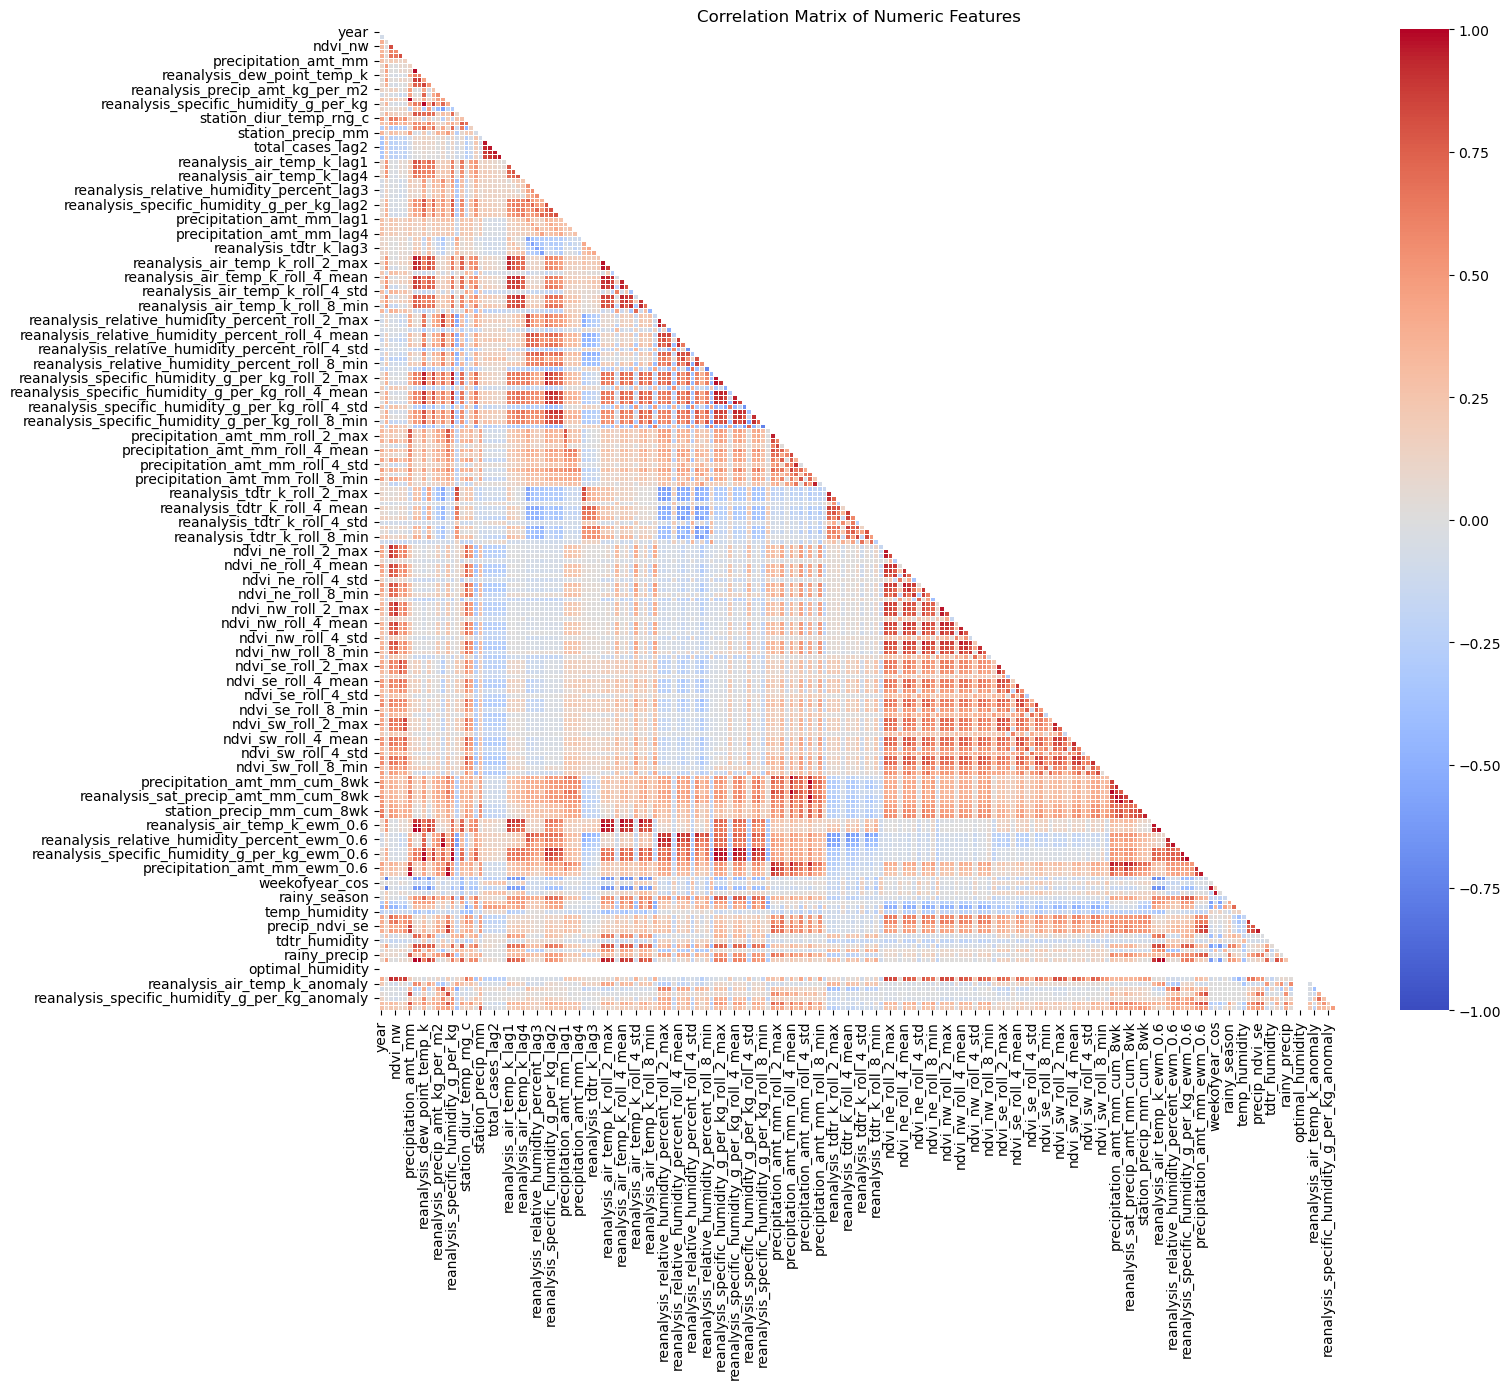

In [89]:
plt.figure(figsize=(16, 14))
corr_matrix = train_imputed.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False,
            center=0, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

Feature importance for San Juan:


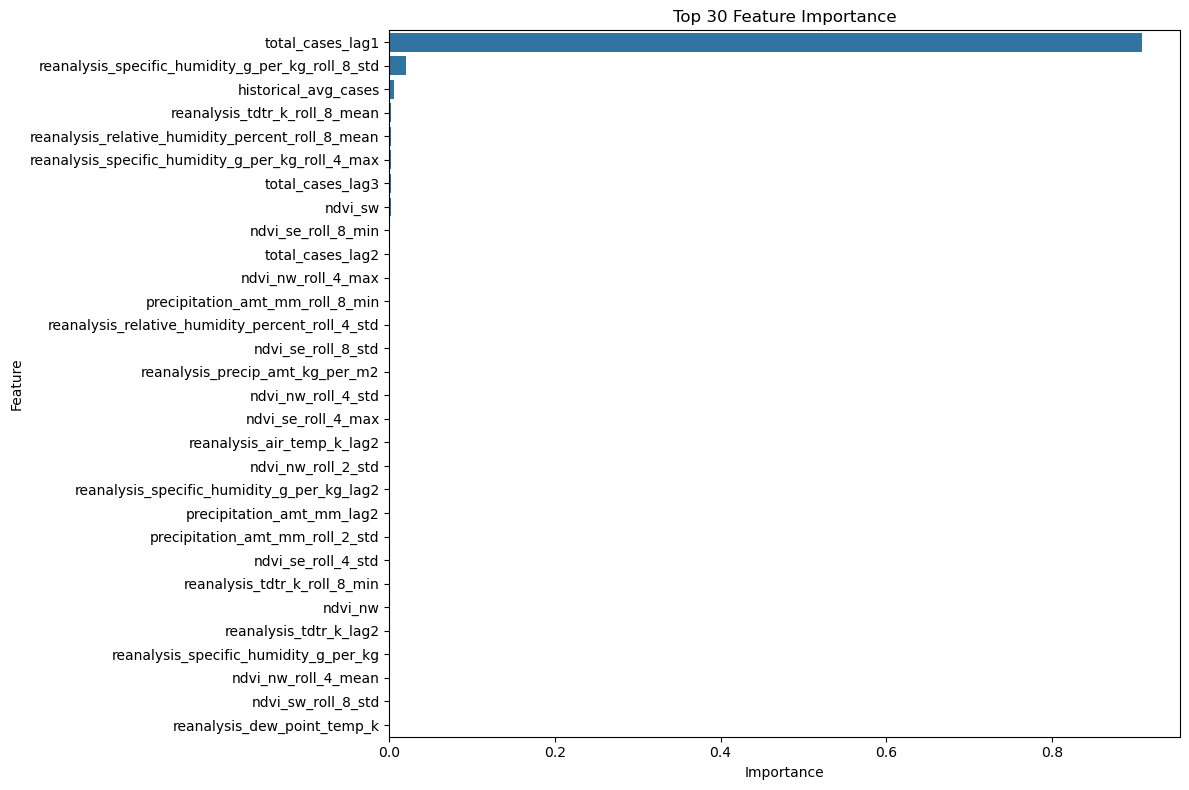

Feature importance for Iquitos:


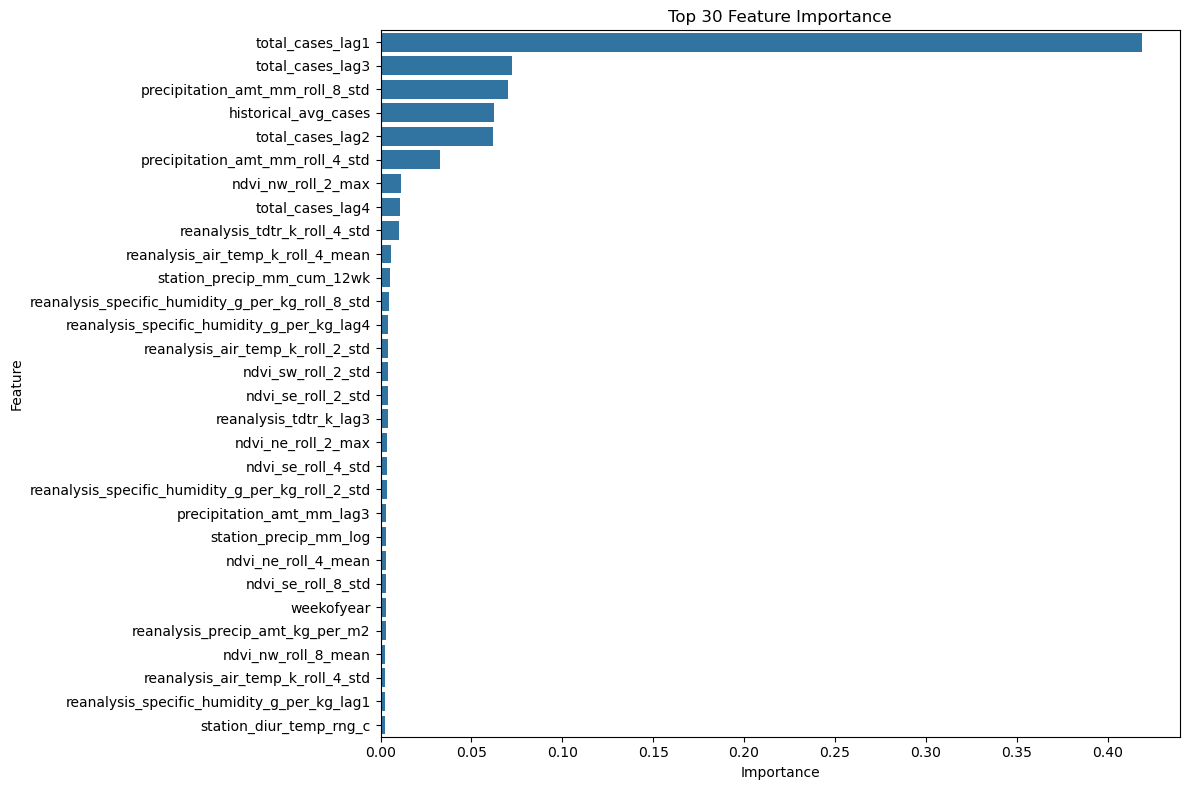

In [90]:
print("Feature importance for San Juan:")
sj_importance = plot_feature_importance(sj_df, 'total_cases', top_n=30)

print("Feature importance for Iquitos:")
iq_importance = plot_feature_importance(iq_df, 'total_cases', top_n=30)

In [91]:
train_imputed.to_csv('dengue_train_engineered.csv', index=False)
test_imputed.to_csv('dengue_test_engineered.csv', index=False)